# Part 1
# Dataset: heart-train.csv

## 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 2. Reading Data into Pandas Dataframe

In [4]:
df1= pd.read_csv('heart-train.csv')

In [5]:
df1.shape

(412, 10)

In [6]:
df1.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
1,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
2,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
3,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
4,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        412 non-null    int64  
 1   tobacco    412 non-null    float64
 2   ldl        412 non-null    float64
 3   adiposity  412 non-null    float64
 4   famhist    412 non-null    object 
 5   typea      412 non-null    int64  
 6   obesity    412 non-null    float64
 7   alcohol    412 non-null    float64
 8   age        412 non-null    int64  
 9   chd        412 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 32.3+ KB


In [8]:
df1.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

In [9]:
df1.index

RangeIndex(start=0, stop=412, step=1)

In [10]:
df1.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,139.240291,3.666262,4.589539,25.151214,52.135922,25.802112,18.030073,42.686893,0.332524
std,20.451903,4.518501,1.883744,7.740794,9.592727,4.081745,25.298909,15.129338,0.471690
min,101.000000,0.000000,0.980000,6.740000,20.000000,17.890000,0.000000,15.000000,0.000000
25%,125.500000,0.037500,3.240000,19.397500,46.000000,22.737500,0.447500,30.750000,0.000000
50%,136.000000,1.805000,4.225000,26.090000,52.000000,25.635000,7.510000,45.000000,0.000000
75%,148.000000,5.850000,5.527500,30.755000,58.000000,28.167500,24.960000,57.000000,1.000000
max,218.000000,27.400000,14.160000,42.490000,73.000000,45.720000,145.290000,64.000000,1.000000


## 3. Data Preparation and Cleaning- Checking for Missing Values

In [11]:
missing_values = {}

# Iterate through columns
for column in df1.columns:
    missing_count = 0
    # Iterate through rows in the column
    for value in df1[column]:
        if pd.isna(value):
            missing_count += 1
    missing_values[column] = missing_count

# Print the missing values for each column
print("Missing values in the heart-train CSV file:")
for column, count in missing_values.items():
    print(f"{column}: {count}")

else:
    print('no missing value')

Missing values in the heart-train CSV file:
sbp: 0
tobacco: 0
ldl: 0
adiposity: 0
famhist: 0
typea: 0
obesity: 0
alcohol: 0
age: 0
chd: 0
no missing value


In [12]:
df1.isnull()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
407,False,False,False,False,False,False,False,False,False,False
408,False,False,False,False,False,False,False,False,False,False
409,False,False,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False,False,False


In [13]:
df1.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

## 4. Data Insights and Descriptive visualizations

### 4.1. Feature Insights: sbp 

#### 4.1.1. Histogram: sbp

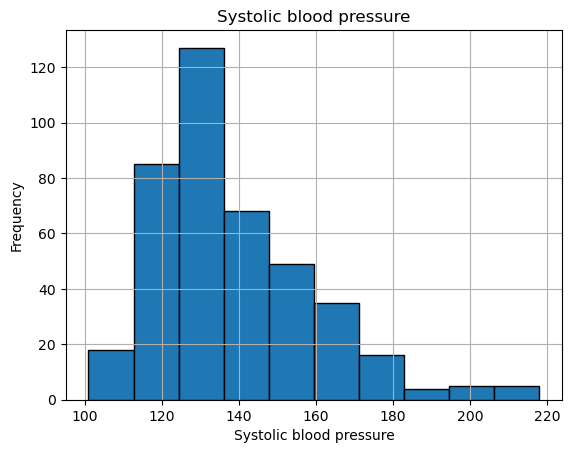

In [14]:
df1.hist(column='sbp', edgecolor = 'black')

# Set the title and axis labels
plt.title('Systolic blood pressure')
plt.xlabel('Systolic blood pressure')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

#### 4.1.2. Boxplot: sbp

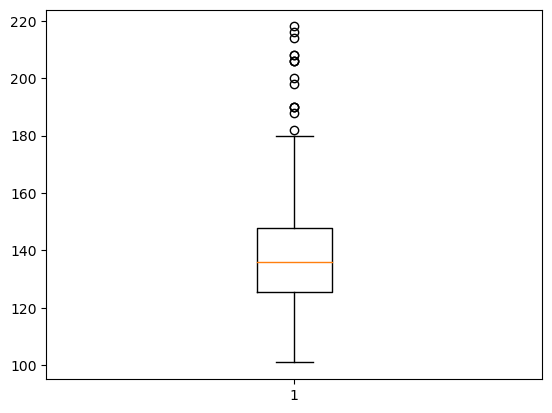

In [15]:
plt.boxplot(df1['sbp'])
plt.show()

### 4.2. Feature Insights: Tobacco 

#### 4.2.1. Histogram: Tobacco 

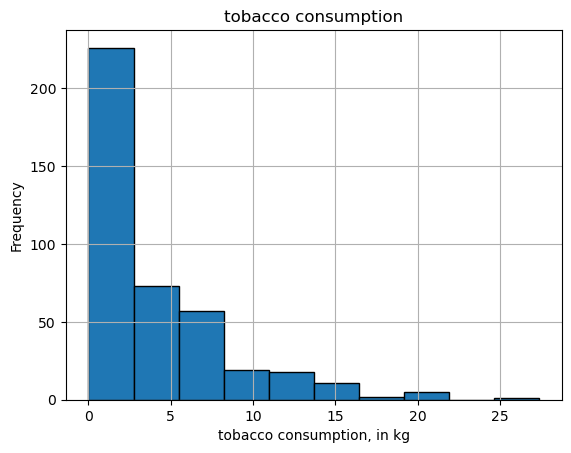

In [16]:
df1.hist(column='tobacco', edgecolor = 'black')

# Set the title and axis labels
plt.title('tobacco consumption')
plt.xlabel('tobacco consumption, in kg')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

#### 4.2.2. Boxplot: Tobacco 

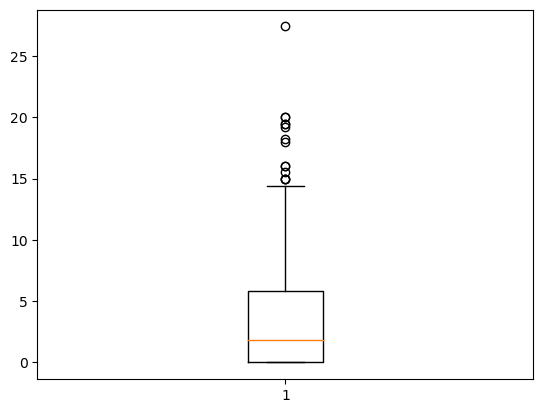

In [17]:
plt.boxplot(df1['tobacco'])
plt.show()

### 4.3. Feature Insights: LDL 

#### 4.3.1. Histogram: LDL 

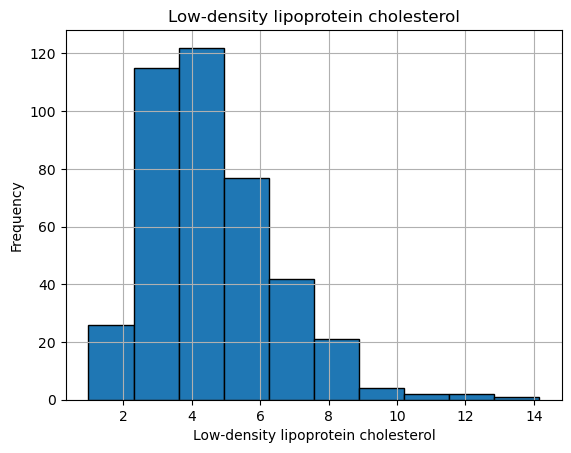

In [18]:
df1.hist(column='ldl', edgecolor = 'black')

# Set the title and axis labels
plt.title('Low-density lipoprotein cholesterol')
plt.xlabel('Low-density lipoprotein cholesterol')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

#### 4.3.2. Boxplot: LDL 

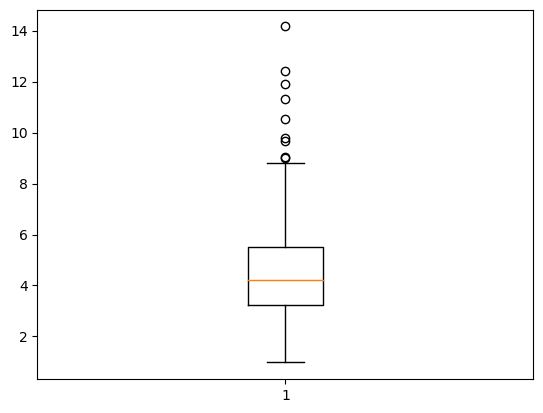

In [19]:
plt.boxplot(df1['ldl'])
plt.show()

### 4.4. Feature Insights: Adiposity 

#### 4.4.1. Histogram: Adiposity 

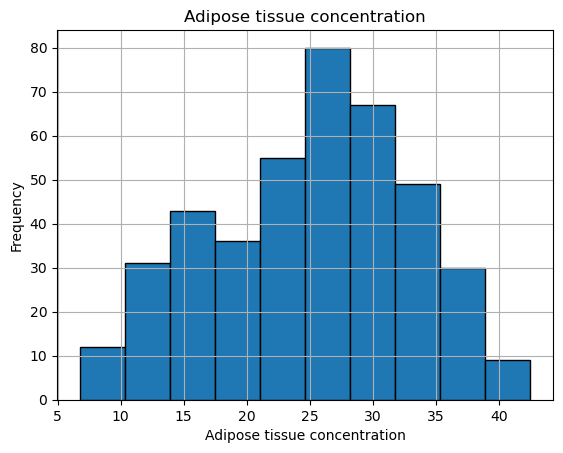

In [20]:
df1.hist(column='adiposity', edgecolor = 'black')

# Set the title and axis labels
plt.title('Adipose tissue concentration')
plt.xlabel('Adipose tissue concentration')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

#### 4.4.2. Boxplot: Adiposity 

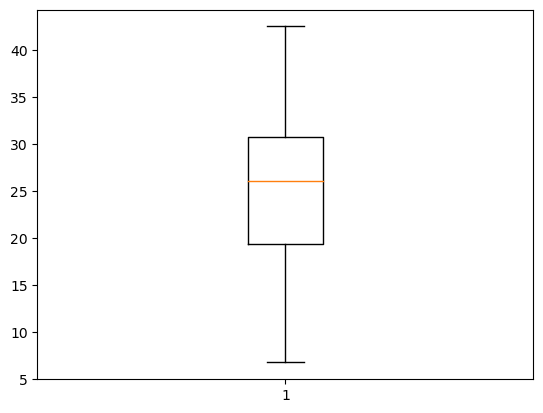

In [21]:
plt.boxplot(df1['adiposity'])
plt.show()

### 4.5. Feature Insights: typeea 

#### 4.5.1. Histogram: typeea 

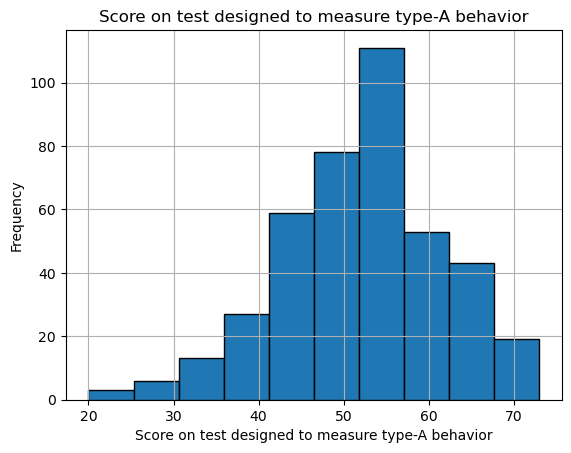

In [22]:
df1.hist(column='typea', edgecolor = 'black')

# Set the title and axis labels
plt.title('Score on test designed to measure type-A behavior')
plt.xlabel('Score on test designed to measure type-A behavior')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

#### 4.5.2. Boxplot: typeea 

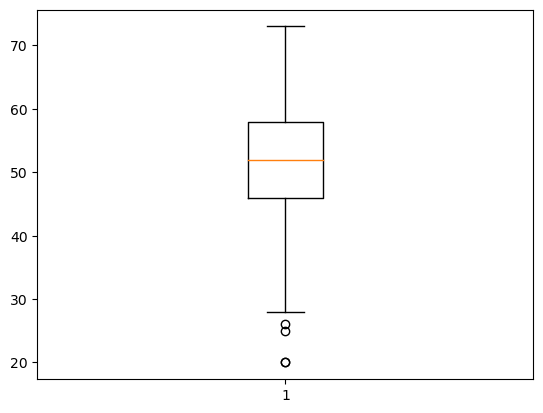

In [23]:
plt.boxplot(df1['typea'])
plt.show()

### 4.6. Feature Insights: Obesity 

#### 4.6.1. Histogram: Obesity 

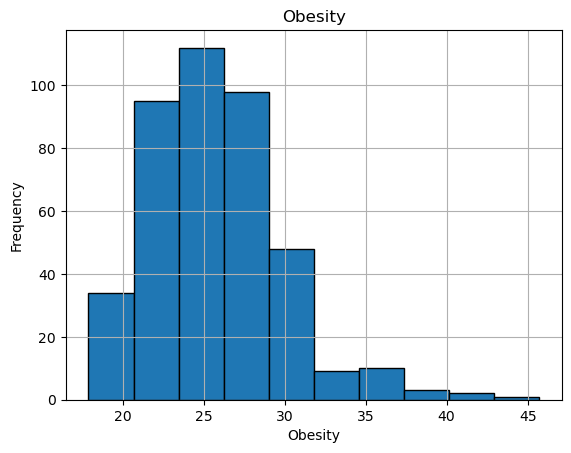

In [24]:
df1.hist(column='obesity', edgecolor = 'black')

# Set the title and axis labels
plt.title('Obesity')
plt.xlabel('Obesity')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

#### 4.6.2. Boxplot: Obesity 

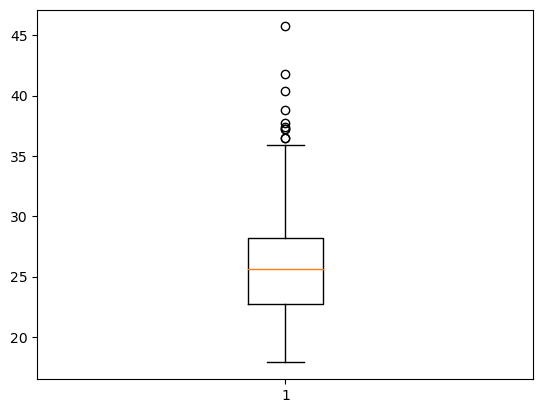

In [25]:
plt.boxplot(df1['obesity'])
plt.show()

### 4.7. Feature Insights: Alcohol 

#### 4.7.1. Histogram: Alcohol 

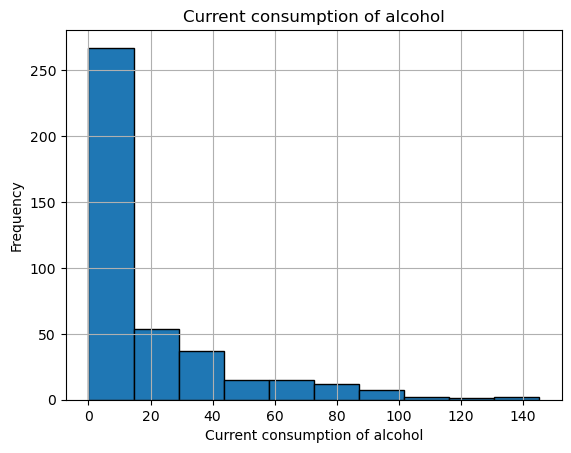

In [26]:
df1.hist(column='alcohol', edgecolor = 'black')

# Set the title and axis labels
plt.title('Current consumption of alcohol')
plt.xlabel('Current consumption of alcohol')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

#### 4.7.2. Boxplot: Alcohol 

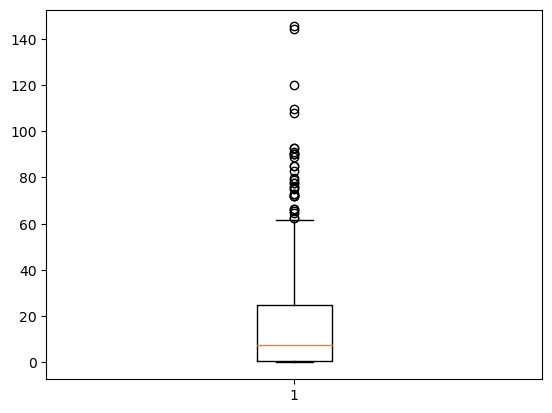

In [27]:
plt.boxplot(df1['alcohol'])
plt.show()

### 4.8. Feature Insights: Age 

#### 4.8.1. Histogram: Age 

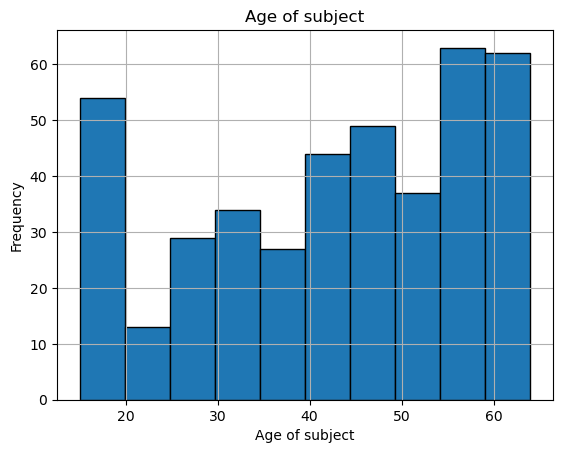

In [28]:
df1.hist(column='age', edgecolor = 'black')

# Set the title and axis labels
plt.title('Age of subject')
plt.xlabel('Age of subject')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

#### 4.8.2. Boxplot: Age 

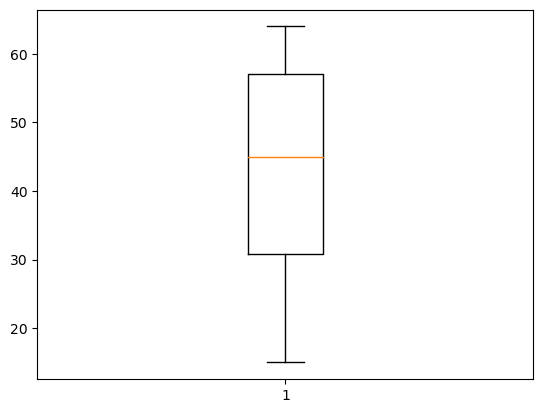

In [29]:
plt.boxplot(df1['age'])
plt.show()

### 5. Oldest Patient

In [30]:
oldest = df1['age'].max()
oldest

64

### 6. Youngest Patient

In [31]:
youngest = df1['age'].min()
youngest

15

### 7. Average age of all the patients

In [32]:
average_age = df1['age'].mean()
average_age

42.68689320388349

### 8. Median age of all the patients

In [33]:
median_age = df1['age'].median()
median_age

45.0

## 9. Visualizing Relationships

### 9.1. Age vs CHD

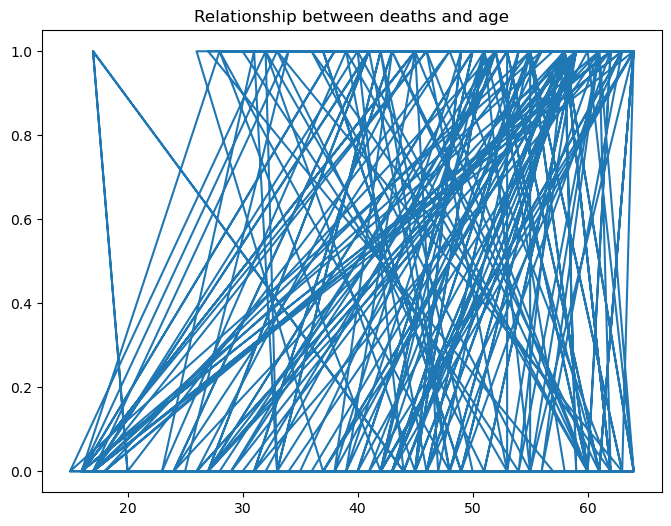

In [34]:
plt.figure(figsize=(8, 6))
plt.title('Relationship between deaths and age')

box_data_y = df1['age'] 
box_data_x = df1['chd']

plt.plot(box_data_y, box_data_x)
plt.show()

### 9.2. Better visualization- Table Format: Age vs CHD

In [35]:
pd.crosstab(index=df1['age'], columns=df1['chd'], margins= True)

chd,0,1,All
age,,,
15,2,0,2
16,22,0,22
17,18,2,20
18,8,0,8
19,2,0,2
20,3,0,3
21,2,0,2
23,2,0,2
24,6,0,6


### 9.3. Count of Patients by CHD

In [36]:
gen_med = df1.groupby(['chd'])['age'].mean().reset_index(name='count')
print(gen_med)

   chd      count
0    0  38.701818
1    1  50.686131


### 9.4. Dead and Survived Patients by Age

Text(0.5, 1.0, 'Count of dead and survived patients by Age')

<Figure size 800x500 with 0 Axes>

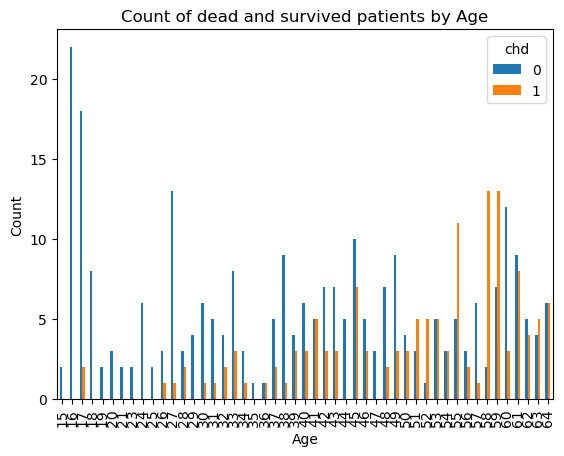

In [37]:
plt.figure(figsize=(8, 5))
df1.groupby(['age', 'chd'])['age'].count().unstack().plot.bar()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of dead and survived patients by Age')

### 9.5. Dead and Survived Patients by SBP

Text(0.5, 1.0, 'Count of dead and survived patients by blood pressure')

<Figure size 800x500 with 0 Axes>

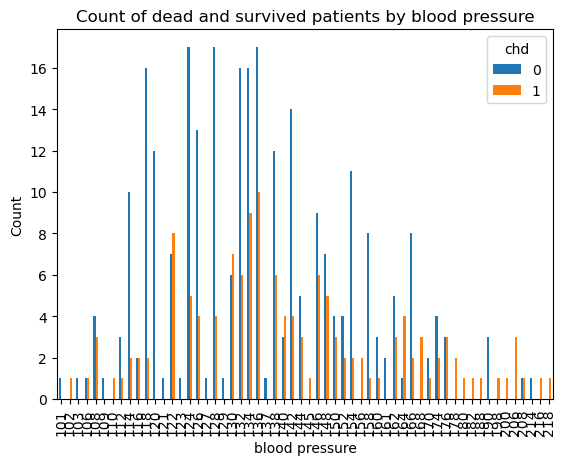

In [38]:
plt.figure(figsize=(8, 5))
df1.groupby(['sbp', 'chd'])['sbp'].count().unstack().plot.bar()
plt.xlabel('blood pressure')
plt.ylabel('Count')
plt.title('Count of dead and survived patients by blood pressure')

### 9.6. Dead and Survived Patients by typeea

Text(0.5, 1.0, 'Count of dead and survived patients by typea')

<Figure size 800x200 with 0 Axes>

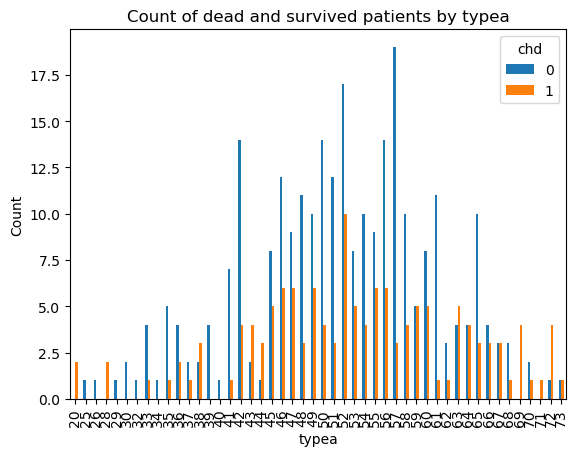

In [39]:
plt.figure(figsize=(8, 2))
df1.groupby(['typea', 'chd'])['typea'].count().unstack().plot.bar()
plt.xlabel('typea')
plt.ylabel('Count')
plt.title('Count of dead and survived patients by typea')

### 9.7. Dead and Survived Patients by Family History

Text(0.5, 1.0, 'Count of dead and survived patients by famhist')

<Figure size 800x200 with 0 Axes>

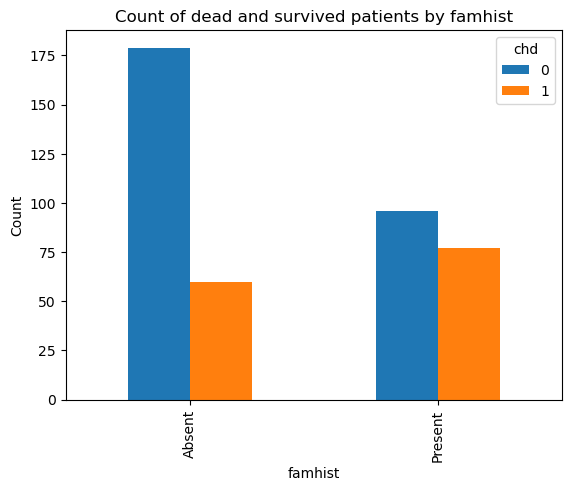

In [40]:
plt.figure(figsize=(8, 2))
df1.groupby(['famhist', 'chd'])['famhist'].count().unstack().plot.bar()
plt.xlabel('famhist')
plt.ylabel('Count')
plt.title('Count of dead and survived patients by famhist')

### 9.8. SBP vs Age Relation

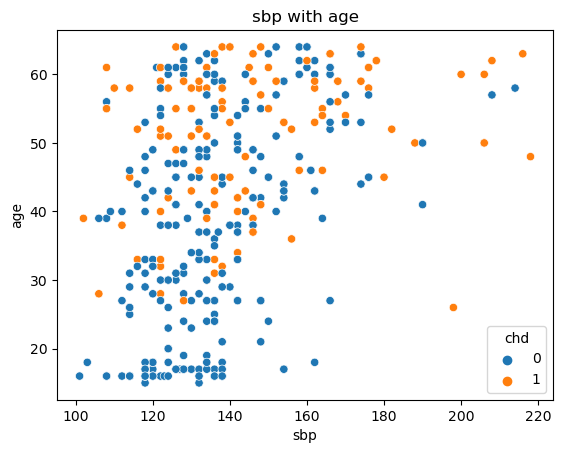

In [41]:
sns.scatterplot(x = df1['sbp'], y = df1['age'], hue = df1['chd'])
plt.xlabel('sbp')
plt.ylabel('age')
plt.title('sbp with age')
plt.show()

### 9.9. LDL vs Obesity relation

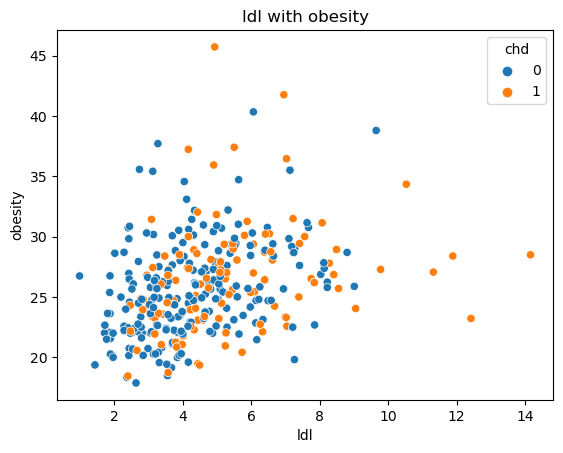

In [42]:
sns.scatterplot(x = df1['ldl'], y = df1['obesity'], hue = df1['chd'])
plt.xlabel('ldl')
plt.ylabel('obesity')
plt.title('ldl with obesity')
plt.show()

### 9.10. Count of Patients by CHD

<Axes: ylabel='chd'>

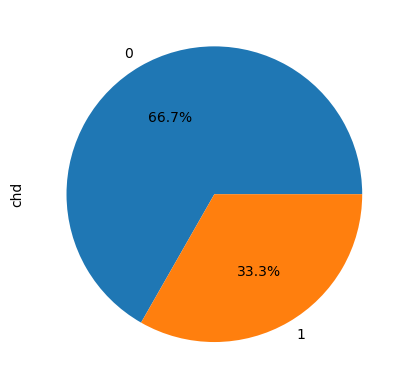

In [43]:
df1['chd'].value_counts().plot.pie(autopct='%1.1f%%',)

### 9.11. Count of Patients by Family History Record and CHD

<Axes: xlabel='famhist', ylabel='count'>

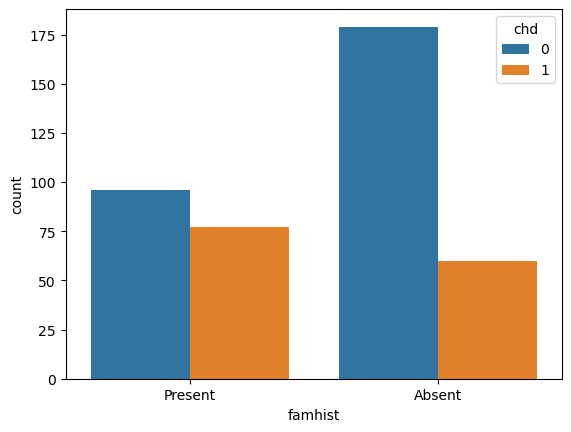

In [44]:
sns.countplot(x="famhist", hue="chd", data=df1)

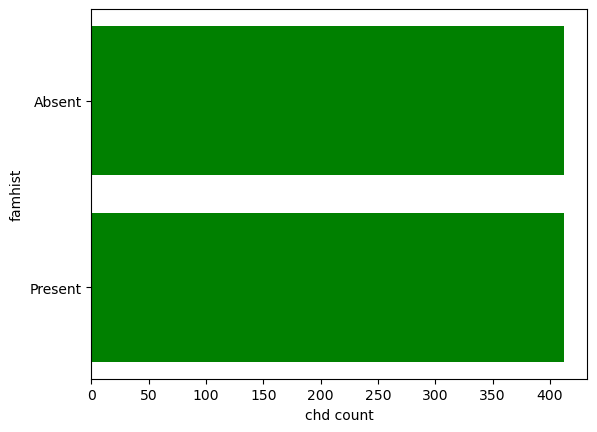

In [45]:
plt.figure("Family history of heart disease with Coronary heart disease")
unique_chd_values = df1['chd'].unique()
bar_colors = ['green', 'red']
legend_labels = ['No CHD', 'CHD']
for i, chd_value in enumerate(unique_chd_values):
    filtered_data = df1[df1['chd'] == chd_value]
    plt.barh(df1['famhist'], df1['chd'].count(), align = "center", color = "green", alpha = 0.3, label=legend_labels[i])
plt.xlabel("chd count")
plt.ylabel("famhist")
plt.show()

### 9.12. SBP Distribution Violin Plot

{'bodies': [<matplotlib.collections.PolyCollection at 0x1969255ab00>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1969255aa70>,
 'cmins': <matplotlib.collections.LineCollection at 0x1969255b100>,
 'cbars': <matplotlib.collections.LineCollection at 0x1969255b460>,
 'cmedians': <matplotlib.collections.LineCollection at 0x1969255b7c0>}

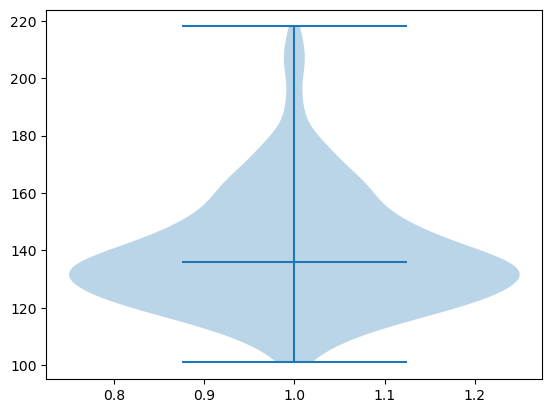

In [46]:
plt.violinplot(df1['sbp'], showmedians=True)

### 9.13. LDL Distribution Violin Plot

{'bodies': [<matplotlib.collections.PolyCollection at 0x196923d6ef0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x19692558d00>,
 'cmins': <matplotlib.collections.LineCollection at 0x196925f5210>,
 'cbars': <matplotlib.collections.LineCollection at 0x196925f5570>,
 'cmedians': <matplotlib.collections.LineCollection at 0x196925f58d0>}

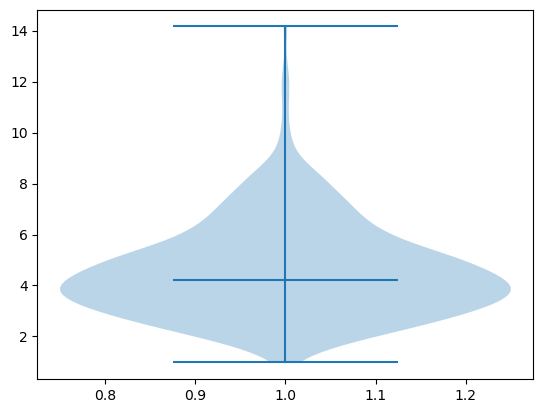

In [47]:
plt.violinplot(df1['ldl'], showmedians=True)

### 9.14. SBP and CHD relationship

<Axes: xlabel='chd', ylabel='sbp'>

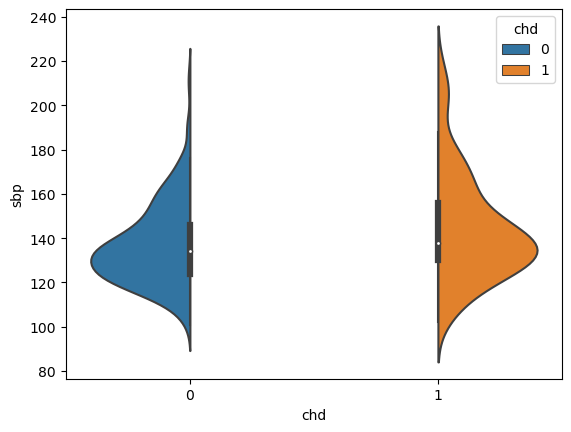

In [48]:
sns.violinplot(y='sbp', x= 'chd', split=True, hue='chd', data=df1)

## 10. Data Distributions

### 10.1. Scatter Matrix 

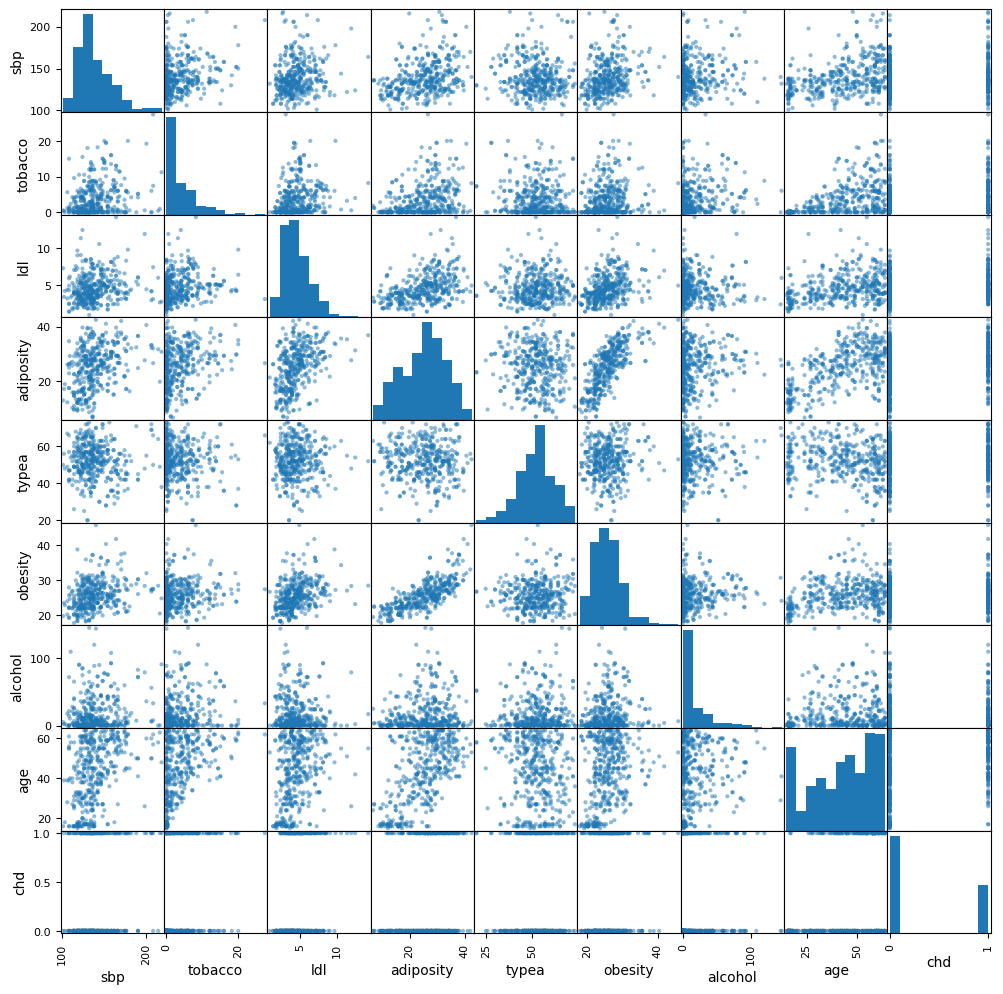

In [49]:
numerical_data = df1[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'chd']]

# Create the scatter matrix
scatter_matrix(numerical_data, alpha=0.5, figsize=(12, 12), diagonal='hist')
plt.show()

### 10.2. Per Column Distribution

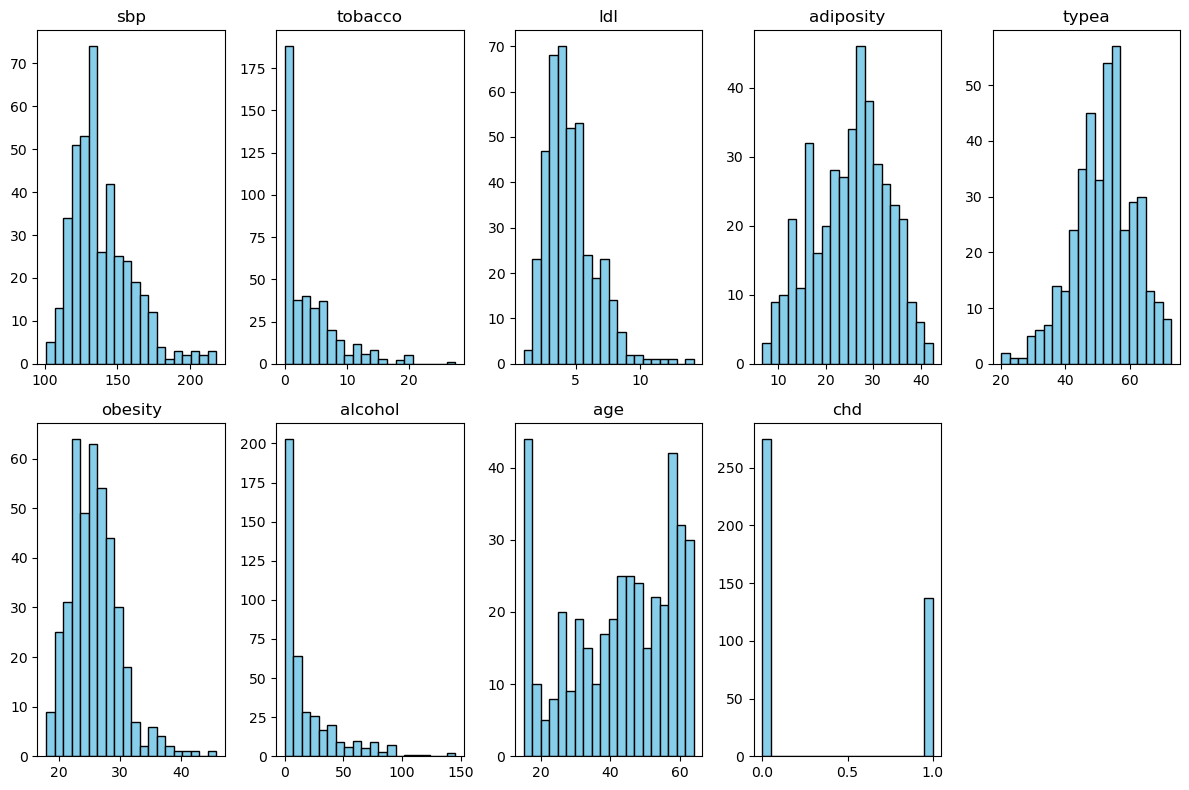

In [50]:
numerical_data = df1[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'chd']]

# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through each column and create a histogram
for col in numerical_data.columns:
    plt.subplot(2, 5, numerical_data.columns.get_loc(col) + 1)  # 2 rows, 4 columns
    plt.hist(numerical_data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

### 10.3. Correlation Matrix

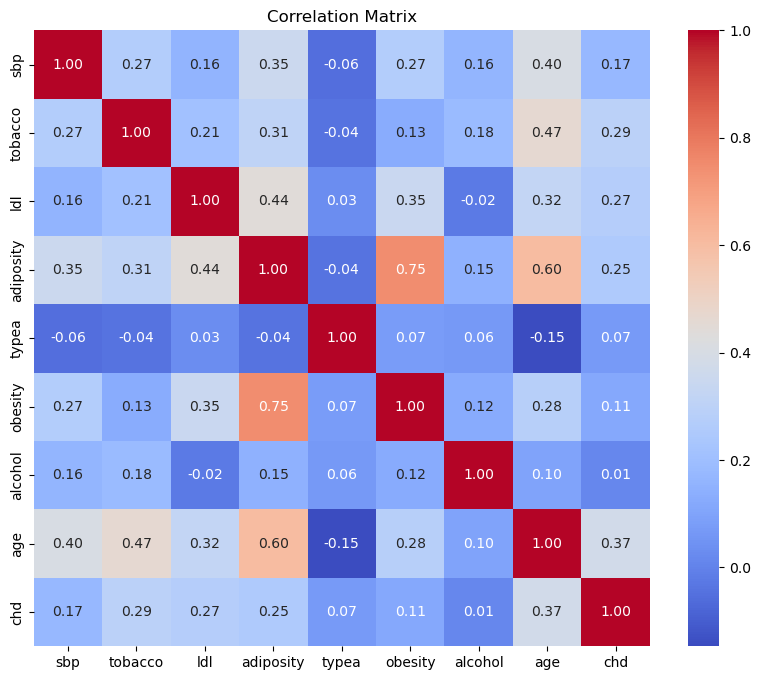

In [51]:
data = df1.drop(columns=['famhist'])

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the plot
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

## 11. Missing Value Handling: Heatmap

In [52]:
missing_count = df1.isnull().sum()
missing_count

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

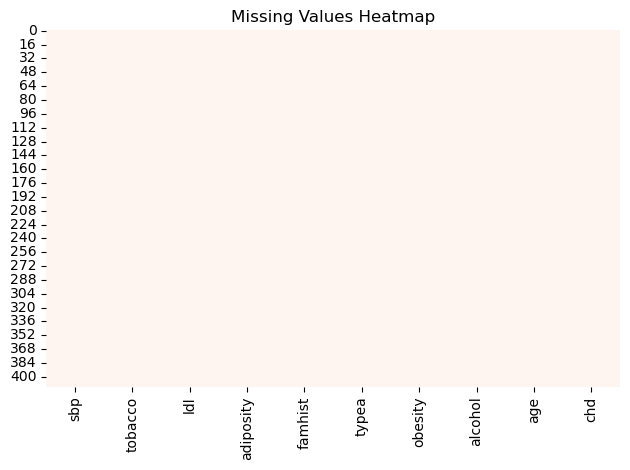

In [53]:
# Calculate missing values
missing = df1.isnull()

# Plot heat map
sns.heatmap(missing, 
            #annot=True, 
            cbar=False, 
            cmap='Reds')

plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

## 14. Feature Scaling

### 14.1. As-Is Plots

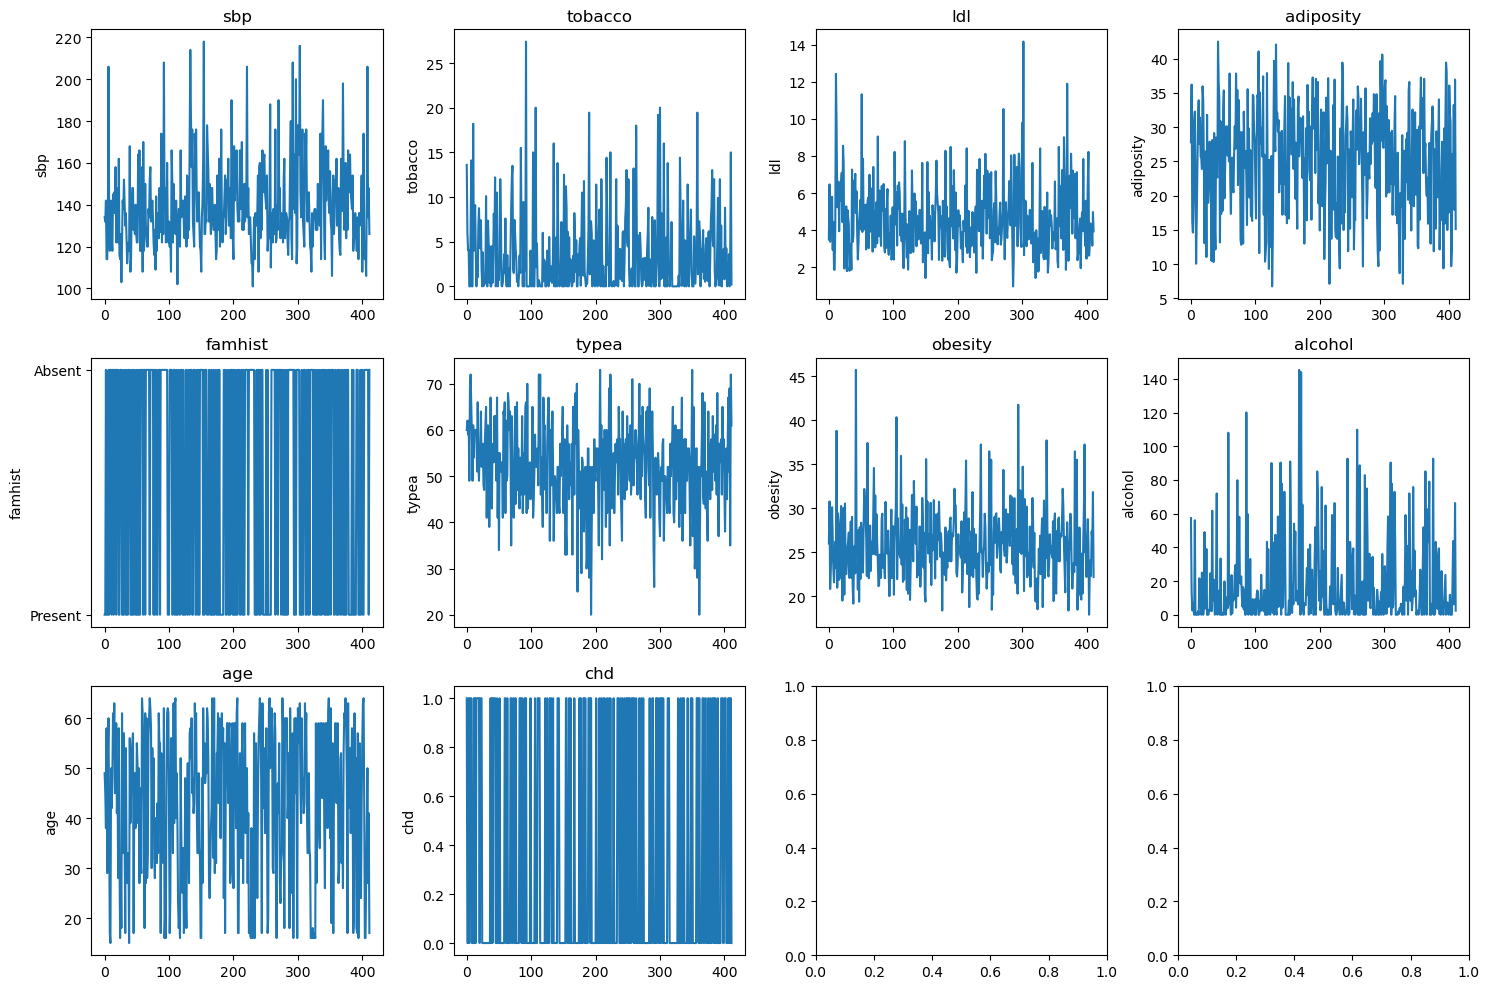

In [54]:
# Create figure and axes
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Iterate through columns
for i, col in enumerate(df1.columns[:10]):  # Limit to the first 8 columns
    
    # Get axis
    ax = axs[i//4, i%4]  # 2 rows and 4 columns
    
    # Plot line chart
    ax.plot(df1[col], marker='', color='tab:blue')
    
    # Label axis
    ax.set_title(col)
    ax.set_ylabel(col)

# Tight layout and show plot
plt.tight_layout()
plt.show()

### 14.2. Standard Scaler

In [55]:
scaler = StandardScaler()

# Fit and transform the data with the scaler
scaled_data = scaler.fit_transform(df1[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'chd']])

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'chd'])

# Display the standardized DataFrame
print(scaled_df)

          sbp   tobacco       ldl  adiposity     typea   obesity   alcohol  \
0   -0.256537  2.201131 -0.579093   0.340015  0.820793  0.046087  1.555708   
1   -0.354446  0.561429  0.999471   1.430374  1.029537  1.218579 -0.153951   
2    0.135101  0.085029 -0.642874  -1.157775  0.716420 -1.224521 -0.609861   
3   -1.235630  0.091677  0.000245  -1.364723  1.029537 -0.660351 -0.447601   
4   -1.235630 -0.812375 -0.403697  -0.743878 -0.327304 -0.231092 -0.615005   
..        ...       ...       ...        ...       ...       ...       ...   
407  0.330919 -0.014682 -0.573778  -0.320927 -0.118559 -0.861490  1.016295   
408  3.268198 -0.812375 -0.222986   1.044933  1.760144  0.382136 -0.469368   
409 -0.256537 -0.147631 -0.754489  -0.936599 -1.788517  0.139298 -0.115167   
410  0.428829  2.511345  0.207531   1.524794  2.073261  1.478588  1.909117   
411 -0.648174 -0.765843 -0.339917  -1.298759  0.925165 -0.890925 -0.617776   

          age       chd  
0    0.417783  1.416792  
1    0.1530

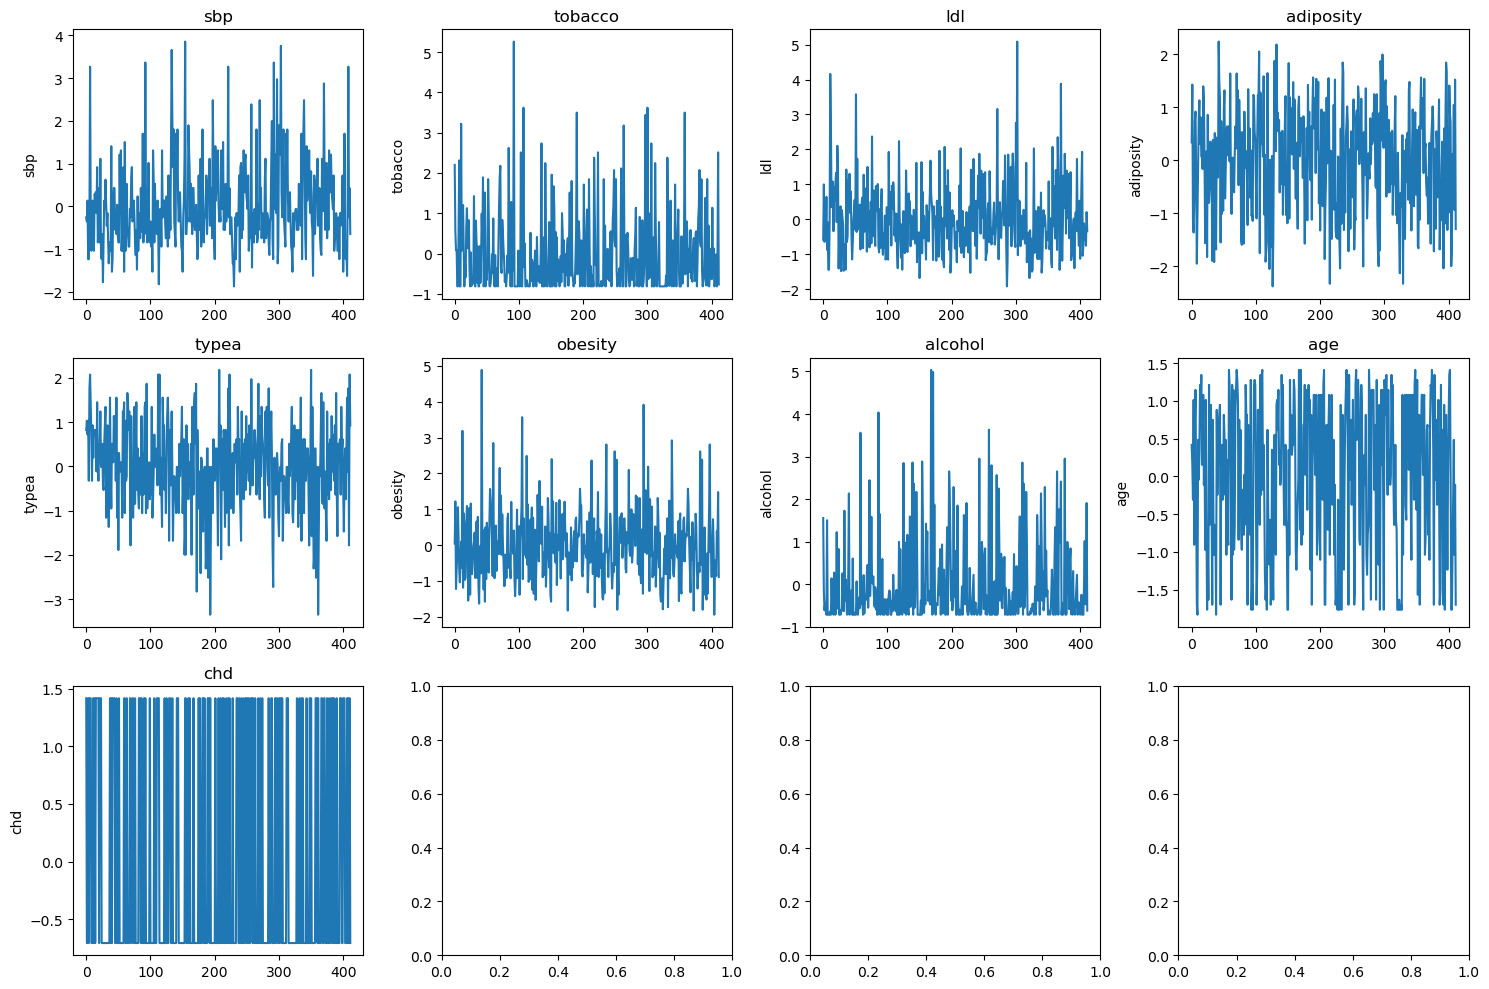

In [56]:
# Create figure and axes
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Iterate through columns
for i, col in enumerate(scaled_df.columns[:10]):  # Limit to the first 8 columns
    
    # Get axis
    ax = axs[i//4, i%4]  # 2 rows and 4 columns
    
    # Plot line chart
    ax.plot(scaled_df[col], marker='', color='tab:blue')
    
    # Label axis
    ax.set_title(col)
    ax.set_ylabel(col)

# Tight layout and show plot
plt.tight_layout()
plt.show()

### 14.3. MixMax Scaler

In [57]:
scaler = MinMaxScaler()
scaled_data_MinMax = scaler.fit_transform(df1[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'chd']])

scaled_df_MinMax = pd.DataFrame(scaled_data_MinMax, columns=['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'chd'])

print(scaled_df_MinMax)

          sbp   tobacco       ldl  adiposity     typea   obesity   alcohol  \
0    0.282051  0.496350  0.191199   0.588531  0.754717  0.291053  0.394659   
1    0.264957  0.226277  0.416540   0.824336  0.792453  0.462810  0.097323   
2    0.350427  0.147810  0.182094   0.264615  0.735849  0.104923  0.018033   
3    0.111111  0.148905  0.273900   0.219860  0.792453  0.187567  0.046252   
4    0.111111  0.000000  0.216237   0.354126  0.547170  0.250449  0.017138   
..        ...       ...       ...        ...       ...       ...       ...   
407  0.384615  0.131387  0.191958   0.445594  0.584906  0.158103  0.300847   
408  0.897436  0.000000  0.242033   0.740979  0.924528  0.340280  0.042467   
409  0.282051  0.109489  0.166161   0.312448  0.283019  0.304707  0.104068   
410  0.401709  0.547445  0.303490   0.844755  0.981132  0.500898  0.456122   
411  0.213675  0.007664  0.225341   0.234126  0.773585  0.153791  0.016656   

          age  chd  
0    0.693878  1.0  
1    0.612245  0.0  


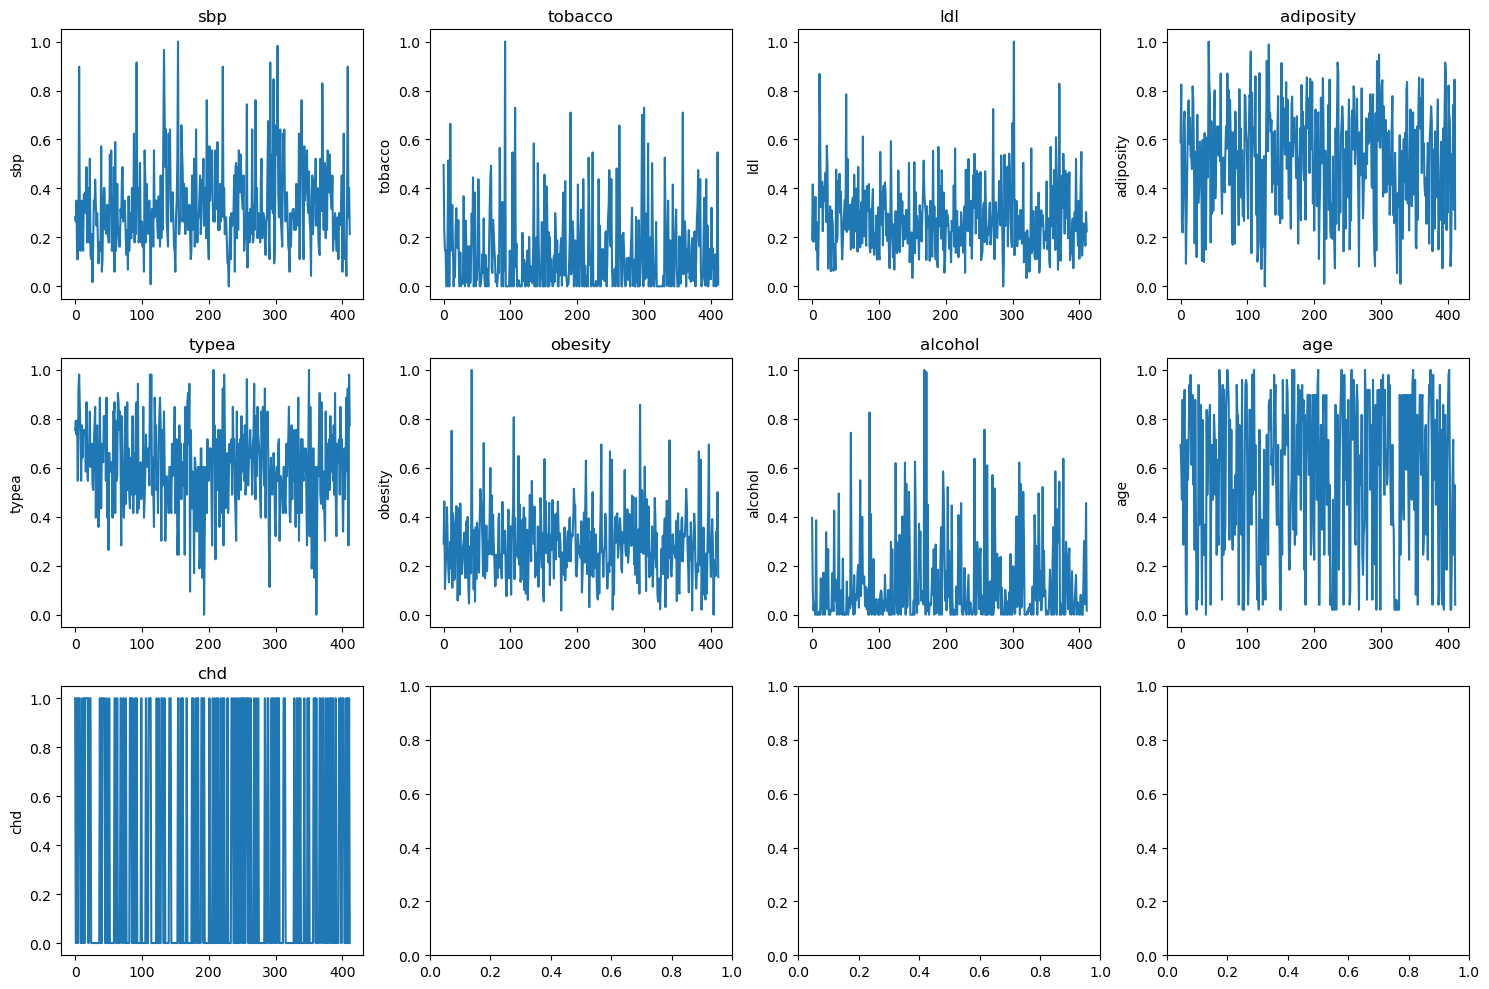

In [58]:
# Create figure and axes
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Iterate through columns
for i, col in enumerate(scaled_df_MinMax.columns[:9]):  # Limit to the first 9 columns
    
    # Get axis
    ax = axs[i//4, i%4]  # 2 rows and 4 columns
    
    # Plot line chart
    ax.plot(scaled_df_MinMax[col], marker='', color='tab:blue')
    
    # Label axis
    ax.set_title(col)
    ax.set_ylabel(col)

# Tight layout and show plot
plt.tight_layout()
plt.show()

## 15. Model Fitting: Logistic Regression

### 15.1. Setting up train data

In [59]:
Train = pd.read_csv('heart-train.csv')

In [60]:
Train.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
1,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
2,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
3,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
4,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


### 15.2. Setting up test data (For predictions only, train used for prediction as well as accuracy)

In [62]:
Test = pd.read_csv('heart-test.csv')

In [63]:
Test.head()

,ID,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,NaN
1,2,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,NaN
2,3,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,NaN
3,4,206,6.00,2.95,32.27,Absent,72,26.81,56.06,60,NaN
4,5,134,14.10,4.44,22.39,Present,65,23.09,0.00,40,NaN


### 15.3. Model Fitting on Train Data. Predictions also on Train Data

#### 15.3.1. Logistics Regression score and MSE Calculation

In [64]:
X = Train[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]
Y = Train['chd']

#x = Test[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]

logistic_regression = LogisticRegression()
logistic_regression.fit(X,Y)
print("Train: ", logistic_regression.score(X, Y))
print("Test: ", logistic_regression.score(X, Y))
print("MSE:",mean_squared_error(logistic_regression.predict(X), Y, squared=True))
pred_lreg = logistic_regression.predict(X)
print(pred_lreg)

Train:  0.7233009708737864
Test:  0.7233009708737864
MSE: 0.2766990291262136
[0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1
 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0]


In [65]:
accuracy_a = accuracy_score(Y, pred_lreg)
print("Accuracy:", accuracy_a)

Accuracy: 0.7233009708737864


In [68]:
pred_train_df = pd.DataFrame(pred_lreg)
pred_train_df.to_excel("prediction_on_train.xlsx", header=None)

#### 15.3.2. Logistics Regression Score on Train Data

In [69]:
X = Train[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]
Y = Train['chd']

logistic_regression = LogisticRegression()
logistic_regression.fit(X,Y)
print("Train: ", logistic_regression.score(X, Y))

Train:  0.7233009708737864


### 15.4. Predictions on Test Data (Using Model Fitted on Train Data)- Method 1

In [70]:
x = Test[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]
y_pred = logistic_regression.predict(x)

In [71]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [72]:
Test.shape

(143, 11)

In [74]:
Test['chd'] = y_pred

In [75]:
Test.head()

,ID,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
1,2,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
2,3,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1
3,4,206,6.00,2.95,32.27,Absent,72,26.81,56.06,60,1
4,5,134,14.10,4.44,22.39,Present,65,23.09,0.00,40,1


In [77]:
Test_Pred = Test[['ID', 'chd']]

In [78]:
Test_Pred.head()

,ID,chd
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


In [80]:
Test_Pred.to_excel("Test_Pred_Results.xlsx", index=False)

In [81]:
Test.columns

Index(['ID', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

### 15.5. Predictions on Test Data (Using Model Fitted on Train Data)- Method 2

In [82]:
# Define X and Y for training and test data
X_train = Train[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]
Y_train = Train['chd']

X_test = Test[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]
# Y_test can be defined if you have true outcomes in your test data, otherwise you won't have it

# Create and fit the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

# Make predictions on the test data (if you have Y_test)
if 'chd' in Test:
    Y_test = Test['chd']
    predictions = logistic_regression.predict(X_test)
    # Evaluate the model's performance using appropriate metrics
else:
    predictions = None  # If you don't have true outcomes in your test data

# Continue with further analysis or actions based on your predictions


In [83]:
print(predictions)

[1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]


In [84]:
Y_test.shape

(143,)

## 16. Model Fitted on 80% data from heart-train and Tested on 20% data from heart-train (Test-Train-Split)

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading complete dataset into a DataFrame
data = pd.read_csv('heart-train.csv') 

# Defining X and Y for the entire dataset
X = data[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]
Y = data['chd']

# Splitting the dataset into a training set and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating and fitting the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = logistic_regression.predict(X_test)

# Evaluating the model's accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6506024096385542


### 16.1. Confusion Matrix for 80-20 Splitted Data from heart-train

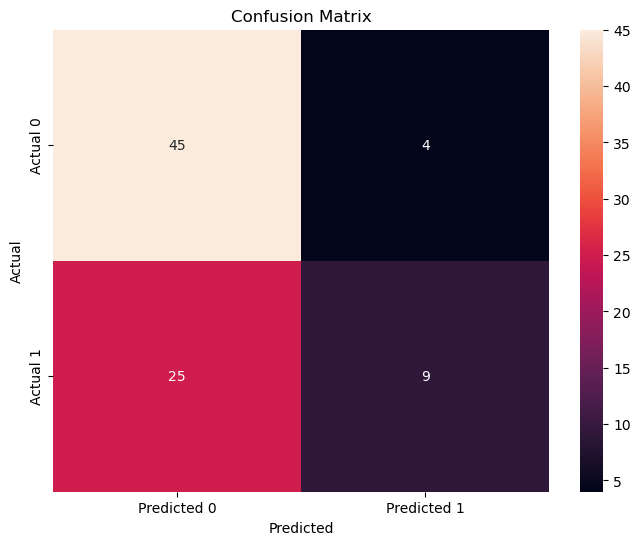

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Build the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [87]:
print(data.shape)
print(X_train.shape)
print(X_test.shape)

(412, 10)
(329, 8)
(83, 8)


In [88]:
83/412

0.20145631067961164

# Part -2
# DATASET- Price.csv

## 1. Load the dataset and perform initial data exploration.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from scipy import stats
from scipy.stats import ttest_ind
import numpy.linalg as nla

In [19]:
data= pd.read_csv('Price.csv')

In [20]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [21]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [24]:
data.shape

(4600, 18)

In [25]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [26]:
data.index

RangeIndex(start=0, stop=4600, step=1)

## 2. Identify the types of variables present and categorize them.

In [23]:
variable_types = data.dtypes

# Categorize the variables based on their types
categorical_vars = variable_types[variable_types == 'object'].index.tolist()
numerical_vars = variable_types[variable_types != 'object'].index.tolist()

print("Categorical Variables:")
print(categorical_vars)

print("Numerical Variables:")
print(numerical_vars)

Categorical Variables:
['date', 'street', 'city', 'statezip', 'country']
Numerical Variables:
['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


## 3. Obtain insights about the data.

In [27]:
data.isnull()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

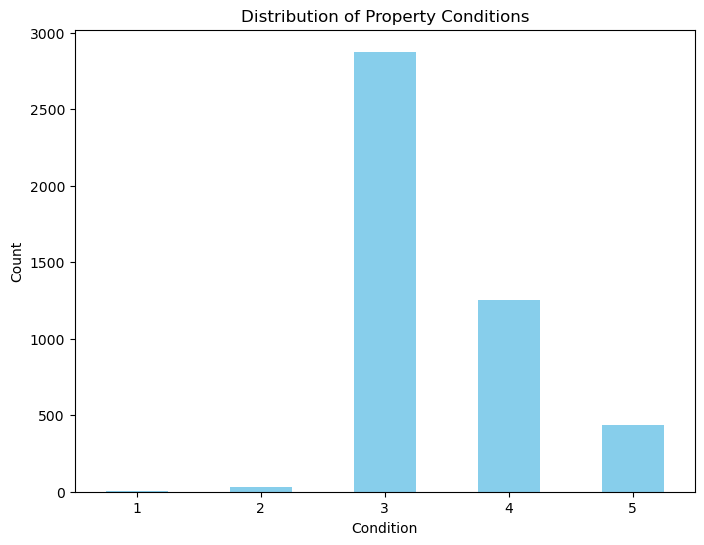

In [29]:
# Create a bar chart for the distribution of property conditions
condition_counts = data['condition'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
condition_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Property Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [30]:
data['bedrooms'].value_counts().to_frame()

,bedrooms
3,2032
4,1531
2,566
5,353
6,61
1,38
7,14
8,2
0,2
9,1


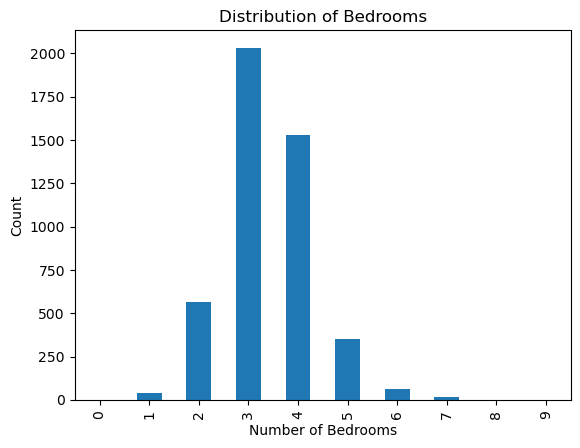

In [31]:
# Bedrooms (Bar Chart)
data['bedrooms'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

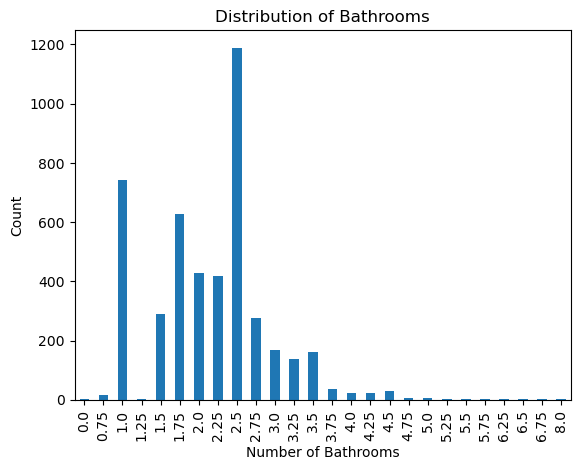

In [32]:
# Bathrooms (Bar Chart)
data['bathrooms'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

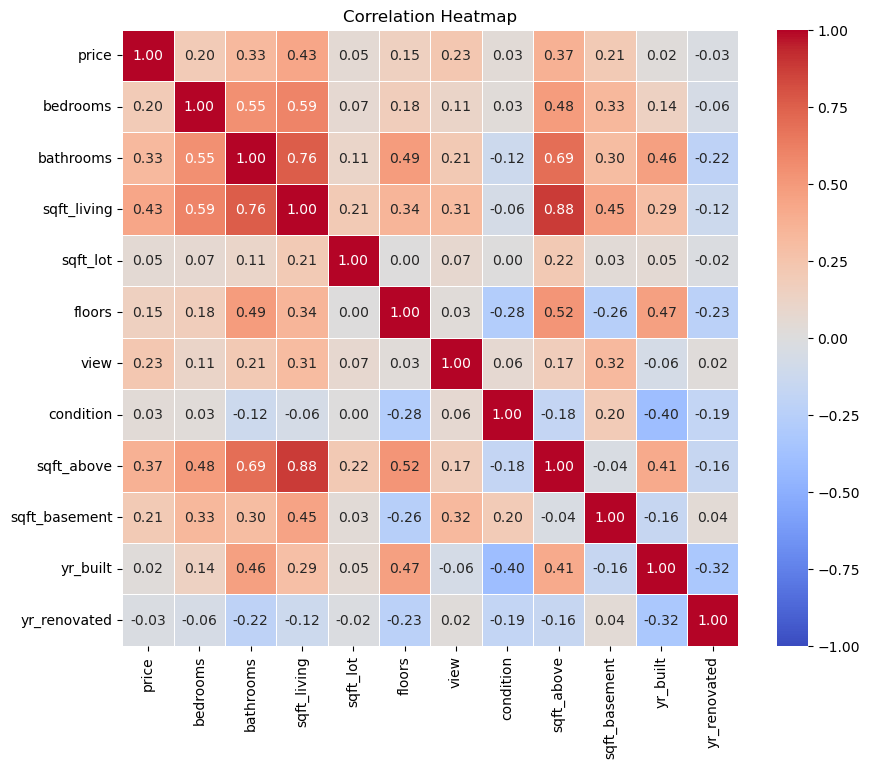

In [33]:
# Create a subset DataFrame with only the numerical columns
numerical_df = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the correlation heatmap
sns.heatmap(numerical_df.corr(), annot=True, vmin = -1, vmax = 1, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, linewidths=0.5, square=True)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Renovated Vs Not Renovated')

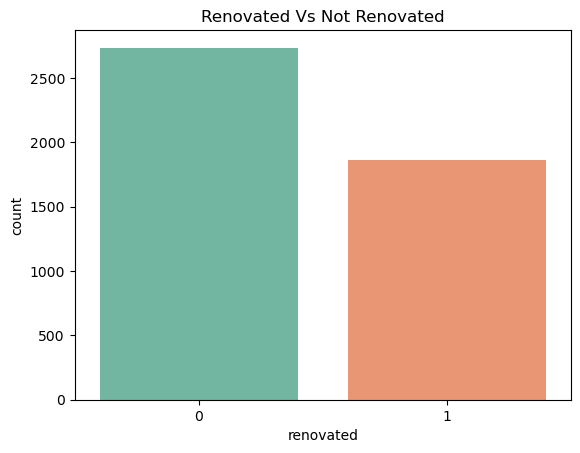

In [34]:
data['renovated'] = (data['yr_renovated'] != 0).astype(int)

sns.countplot(x='renovated', data=data, palette='Set2')
plt.title('Renovated Vs Not Renovated')

Text(0.5, 1.0, 'Houses which have waterfront')

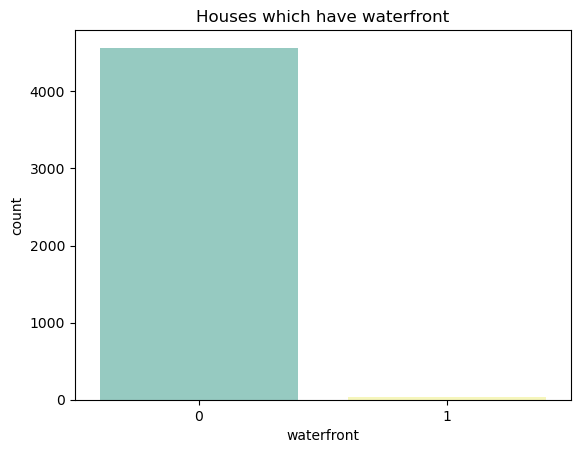

In [35]:
sns.countplot(x='waterfront', data=data, palette='Set3')
plt.title('Houses which have waterfront')

## 4. Find the number of missing values for each column.

In [36]:
missing_values = data.isnull().sum()
print(missing_values)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
renovated        0
dtype: int64


In [37]:
missing_values = {}

# Iterate through columns
for column in data.columns:
    missing_count = 0
    # Iterate through rows in the column
    for value in data[column]:
        if pd.isna(value):
            missing_count += 1
    missing_values[column] = missing_count
# Print the missing values for each column
print("Missing values in the CSV file:")
for column, count in missing_values.items():
    print(f"{column}: {count}")
else:
    print('no missing value')

Missing values in the CSV file:
date: 0
price: 0
bedrooms: 0
bathrooms: 0
sqft_living: 0
sqft_lot: 0
floors: 0
waterfront: 0
view: 0
condition: 0
sqft_above: 0
sqft_basement: 0
yr_built: 0
yr_renovated: 0
street: 0
city: 0
statezip: 0
country: 0
renovated: 0
no missing value


##  5. Calculate summary statistics for numerical columns, such as mean, median, standard deviation, etc.

In [38]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,0.405435
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,0.491029
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,1.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,1.000000


## 6. Analyze the distribution of the numerical feature “price” using a distribution plot such as a histogram.

Text(0.5, 1.0, 'Histogram of Price')

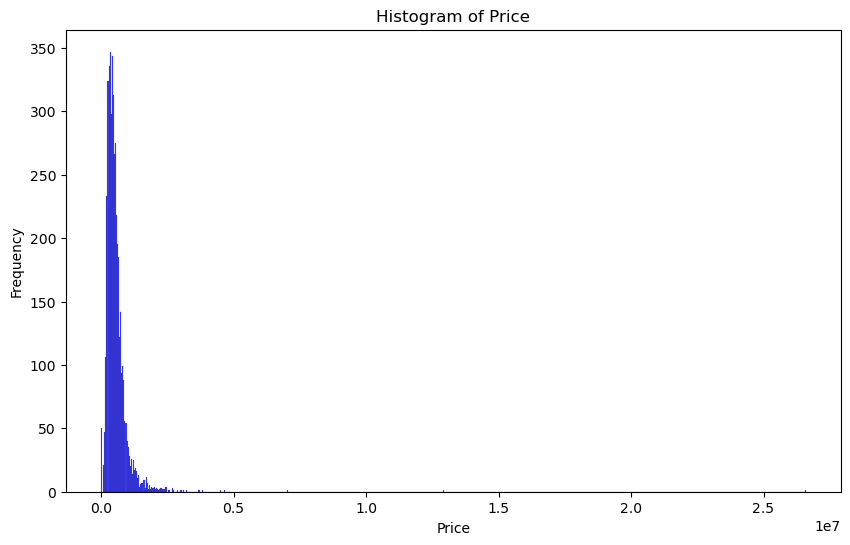

In [39]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.histplot(data['price'], color='blue')  # Use kde=True to add a kernel density estimation plot

# Add labels and a title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

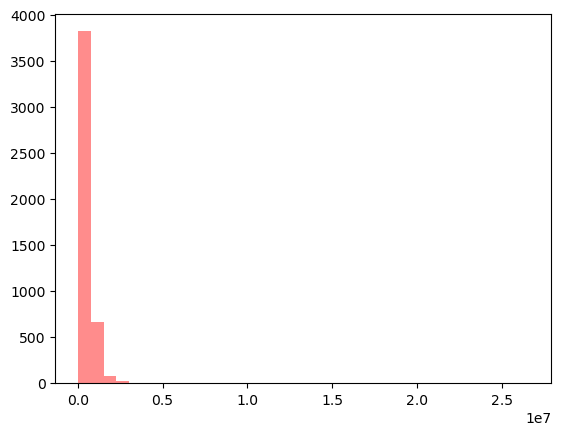

In [40]:
plt.hist(data['price'],bins = 35, alpha = 0.45, color = 'red') 
plt.show()

C:\Users\1000302185\AppData\Local\Temp\ipykernel_30640\2309002448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

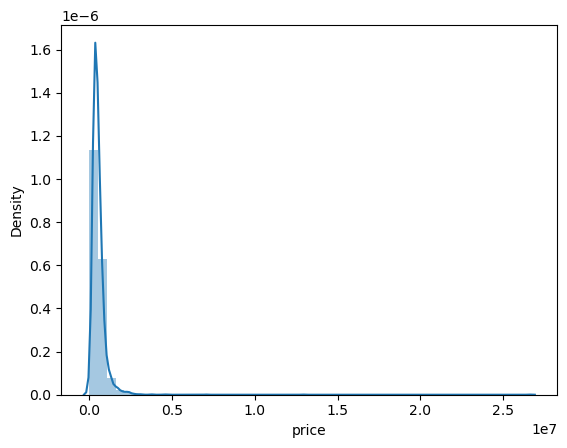

In [41]:
sns.distplot(data['price'])

## 7. Observe the histogram, Does it look like it falls under any probability distribution? Does it look like a bell curve?
- Histogram being right-skewed, it indicates that the data is not normally distributed. In a right-skewed distribution, the tail of the distribution is extended to the right, which means there are more data points with lower values and relatively fewer data points with higher values.
- In summary, the histogram of the "price" feature does not resemble a bell curve or a normal distribution. It exhibits right-skewness, suggesting that the dataset is characterized by a wider range of property prices with a higher concentration of lower-priced properties.

## 8. Use the Shapiro-Wilk test to do a normality test and check if the “price” feature follows the normal distribution (if the p-value is greater than 0.05 then the feature follows the Normal distribution)

In [42]:
price_data = data['price']

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(price_data)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is greater than alpha
if p_value > alpha:
    print("The 'price' feature follows a normal distribution (p-value =", p_value, ")")
else:
    print("The 'price' feature does not follow a normal distribution (p-value =", p_value, ")")

The 'price' feature does not follow a normal distribution (p-value = 0.0 )


## 9. Consider the Hypothesis "The year built has a significant impact on sale price.”. Do a hypothesis test using a t-test: split into two groups: properties built before 1990 and those built-in or after 1990. (alpha/confidence interval= 95%)

In [43]:
data_before_1990 = data[data['yr_built'] < 1990]['price']
data_after_1990 = data[data['yr_built'] >= 1990]['price']
t_statistic, p_value = ttest_ind(data_before_1990, data_after_1990)

# Print the results
print("Independent t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results based on the p-value and alpha level
alpha = 0.05
if p_value > alpha:
    print("Cannot reject null hypothesis (H0 wins): There is no significant impact of year built on sale price.")
else:
    print("Cannot accept H0 (H1 wins): The year built has a significant impact on sale price.")

Independent t-test results:
T-statistic: -5.014550457612197
P-value: 5.51579911487353e-07
Cannot accept H0 (H1 wins): The year built has a significant impact on sale price.


In [44]:
data_before_1990

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4589    1.828050e+05
4591    3.961667e+05
4595    3.081667e+05
4596    5.343333e+05
4598    2.034000e+05
Name: price, Length: 3094, dtype: float64

In [45]:
print(data_before_1990.mean())
print(data_before_1990.std())

522954.83150332706
429085.6547479643


In [46]:
data_after_1990

17      367500.000000
22      626000.000000
23      612500.000000
31      499950.000000
33      625000.000000
            ...      
4592    252980.000000
4593    289373.307692
4594    210614.285714
4597    416904.166667
4599    220600.000000
Name: price, Length: 1506, dtype: float64

In [47]:
print(data_after_1990.mean())
print(data_after_1990.std())

611558.763815067
766684.912932498


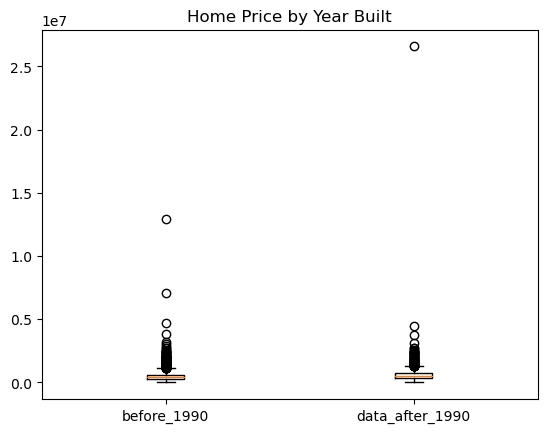

In [48]:
plt.boxplot([data_before_1990, data_after_1990])
plt.xticks([1,2], ['before_1990', 'data_after_1990']) 
plt.title('Home Price by Year Built')
plt.show()

## 10.Consider the Hypothesis "The year built has a significant impact on sale price.Do a Hypothesis test using ANOVA: Assume that you have 3 groups: groupA has all houses built in 1990, groupB has all houses that were built in 2000 and groupC has all houses built in 2010 (alpha/confidence interval = 95%)

In [49]:
groupA = data[data['yr_built'] == 1990]['price']
groupB = data[data['yr_built'] == 2000]['price']
groupC = data[data['yr_built'] == 2010]['price']

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(groupA, groupB, groupC)
print("ANOVA test results:")
print("f-statistic:", f_statistic)
print("P-value:", p_value)

# Set the significance level (alpha)
alpha = 0.05  # 95% confidence interval

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis: The year built has a significant impact on sale price (p-value =", p_value, ")")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of year built on sale price (p-value =", p_value, ")")

ANOVA test results:
f-statistic: 4.286625058295787
P-value: 0.015547293538959776
Reject the null hypothesis: The year built has a significant impact on sale price (p-value = 0.015547293538959776 )


In [50]:
groupA

43      4.399500e+05
70      3.319500e+05
90      8.008660e+05
305     3.750000e+05
373     1.250000e+06
            ...     
4408    0.000000e+00
4413    0.000000e+00
4419    6.734768e+05
4468    3.153687e+05
4599    2.206000e+05
Name: price, Length: 71, dtype: float64

In [51]:
groupA.mean()

523452.2467349578

In [52]:
groupB

50      6.300000e+05
75      5.310000e+05
100     7.365000e+05
133     1.425000e+06
189     8.600000e+05
210     6.555000e+05
293     2.800000e+05
486     7.500000e+05
591     9.750000e+05
686     7.400000e+05
1048    7.200000e+05
1196    6.225000e+05
1272    9.000000e+05
1345    1.795000e+06
1480    8.400000e+05
1504    4.748000e+05
1555    9.500000e+05
1580    6.725000e+05
1620    3.849500e+05
1637    3.710000e+06
2100    7.000000e+05
2195    4.400000e+05
2238    7.100000e+05
2255    4.150000e+05
2466    3.800000e+05
2479    3.249000e+05
2498    7.990000e+05
2580    3.850000e+05
2641    4.210000e+05
2670    1.170000e+06
2766    4.400000e+05
2787    3.000000e+05
2933    7.250000e+05
3022    9.300000e+05
3260    8.390000e+05
3321    7.250000e+05
3570    4.150000e+05
3572    4.900000e+05
3890    4.458380e+05
3906    1.100000e+06
3946    1.150000e+06
4047    4.380000e+05
4174    9.890000e+05
4185    3.560000e+05
4222    2.998800e+05
4396    5.774375e+05
4428    4.350000e+05
4484    6.416

In [53]:
groupB.mean()

743634.1423611041

In [54]:
groupC

138      509900.0
145      415000.0
387      438000.0
462     2238888.0
540      635000.0
542      383000.0
598      450000.0
777      386380.0
838      445000.0
1207     321000.0
1213     660000.0
1736     298000.0
1827     575000.0
2179     315000.0
2349     547500.0
2520     735000.0
2559     680000.0
2673     472000.0
2810     309000.0
2812     415000.0
3269     859000.0
3274     790000.0
3401     518500.0
3885     274500.0
4152     435000.0
4158     760005.0
4268     741500.0
4271     530000.0
Name: price, dtype: float64

In [55]:
groupC.mean()

576327.6071428572

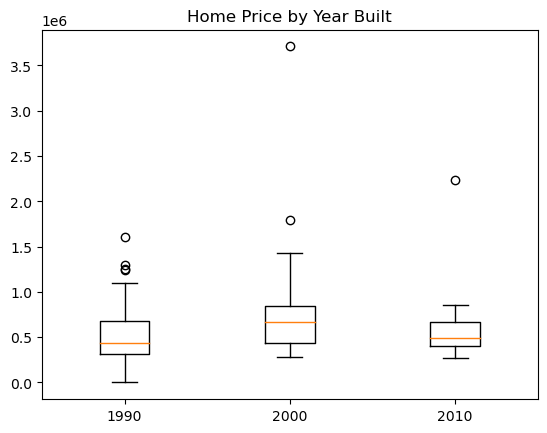

In [56]:
plt.boxplot([groupA, groupB, groupC])
plt.xticks([1,2,3], ['1990', '2000', '2010']) 
plt.title('Home Price by Year Built')
plt.show()

## 11. Does the ANOVA conclusion change from the t-test or is it the same?
•The conclusions from both tests indicate that the year built has a significant impact on sale prices.
•The ANOVA conclusion is broader, stating that there are significant differences among all three groups but not specifying which groups are different from each other.
•The t-test is more specific, pointing out that the properties built before 1990 and those built in or after 1990 have significantly different average sale prices.

#### In summary, while both tests suggest a significant impact of the year built on sale prices, the t-test provides more specific information by comparing two groups at a time. The ANOVA test offers a broader view of the differences among all three groups but doesn't specify pairwise group differences. The choice between the two tests depends on the specific research question and the level of detail required in the analysis.

## 12. Calculate the covariance matrix of the numerical features present in the dataset.

In [57]:
# Calculate the covariance matrix
numerical_features = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]  # Select numerical columns

cov_matrix = numerical_features.cov()

# Display the covariance matrix
print(cov_matrix)

                      price       bedrooms      bathrooms   sqft_living  \
price          3.179096e+11  102660.349539  144557.386308  2.337512e+08   
bedrooms       1.026603e+05       0.826005       0.388879  5.207667e+02   
bathrooms      1.445574e+05       0.388879       0.614313  5.746279e+02   
sqft_living    2.337512e+08     520.766735     574.627928  9.277676e+05   
sqft_lot       1.020776e+09    2244.440169    3032.987546  7.277080e+06   
floors         4.596921e+04       0.087030       0.205224  1.787990e+02   
view           1.002886e+05       0.078547       0.129317  2.331839e+02   
condition      1.333196e+04       0.015437      -0.063693 -4.098216e+01   
sqft_above     1.786832e+08     379.805727     466.213556  7.278398e+05   
sqft_basement  5.506793e+07     140.961008     108.414371  1.999278e+05   
yr_built       3.664046e+05       3.849544      10.801007  8.241284e+03   
yr_renovated  -1.588961e+07     -54.371088    -165.724334 -1.158628e+05   

                   sqft_

In [58]:
cov_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,3.179096e+11,102660.349539,144557.386308,2.337512e+08,1.020776e+09,45969.211306,100288.560225,13331.964009,1.786832e+08,5.506793e+07,366404.580177,-1.588961e+07
bedrooms,1.026603e+05,0.826005,0.388879,5.207667e+02,2.244440e+03,0.087030,0.078547,0.015437,3.798057e+02,1.409610e+02,3.849544,-5.437109e+01
bathrooms,1.445574e+05,0.388879,0.614313,5.746279e+02,3.032988e+03,0.205224,0.129317,-0.063693,4.662136e+02,1.084144e+02,10.801007,-1.657243e+02
sqft_living,2.337512e+08,520.766735,574.627928,9.277676e+05,7.277080e+06,178.799031,233.183935,-40.982165,7.278398e+05,1.999278e+05,8241.284422,-1.158628e+05
sqft_lot,1.020776e+09,2244.440169,3032.987546,7.277080e+06,1.287693e+09,72.430823,2064.408500,13.563290,6.696771e+06,5.803091e+05,54099.138794,-7.988735e+05
floors,4.596921e+04,0.087030,0.205224,1.787990e+02,7.243082e+01,0.289754,0.013078,-0.100255,2.426355e+02,-6.383649e+01,7.481705,-1.233643e+02
view,1.002886e+05,0.078547,0.129317,2.331839e+02,2.064409e+03,0.013078,0.605914,0.033252,1.169935e+02,1.161904e+02,-1.491941,1.750960e+01
condition,1.333196e+04,0.015437,-0.063693,-4.098216e+01,1.356329e+01,-0.100255,0.033252,0.458640,-1.040464e+02,6.306427e+01,-8.048041,-1.239145e+02
sqft_above,1.786832e+08,379.805727,466.213556,7.278398e+05,6.696771e+06,242.635523,116.993512,-104.046439,7.433353e+05,-1.549557e+04,10472.341362,-1.354667e+05
sqft_basement,5.506793e+07,140.961008,108.414371,1.999278e+05,5.803091e+05,-63.836492,116.190423,63.064274,-1.549557e+04,2.154234e+05,-2231.056939,1.960384e+04


## 13. Create a heatmap of the covariance matrix. What do the colors in the heatmap represent?
#### This suggests that "price" does not have strong linear relationships with the other variables, and they are not highly correlated in terms of covariance. This can be valuable information when analyzing the relationships between these variables, as it implies that changes in the other variables are not strongly associated with changes in the price.

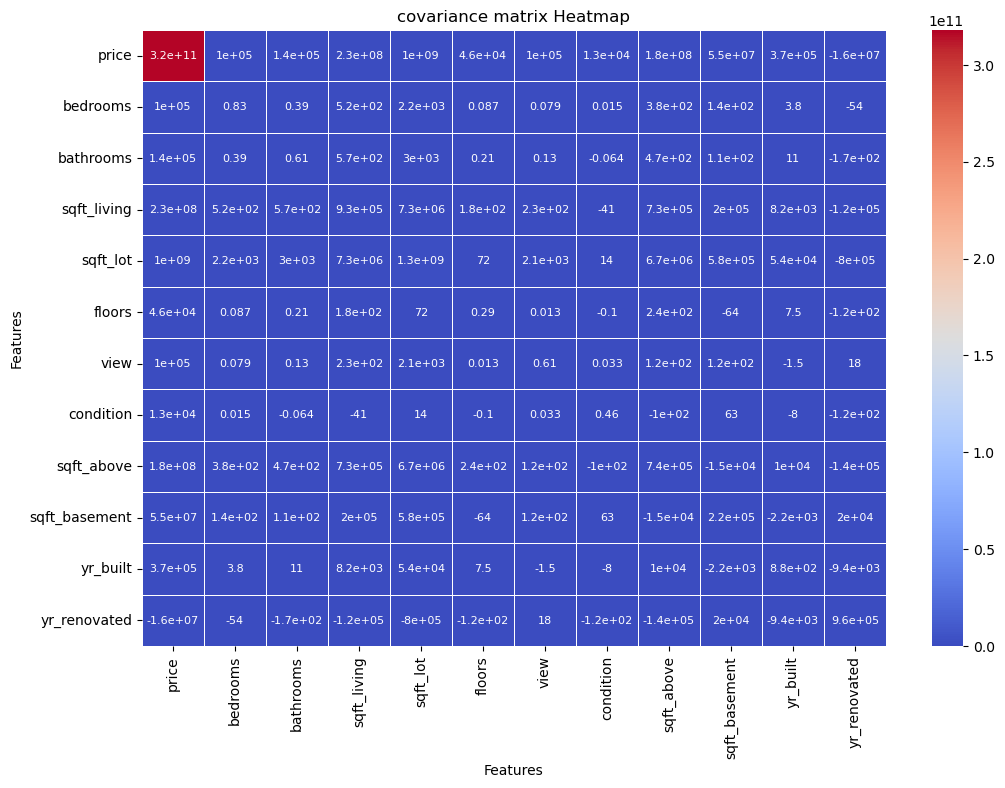

In [59]:
plt.figure(figsize=(12, 8))  # Set the size of the heatmap
sns.heatmap(cov_matrix, annot=True,  cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})

plt.xlabel('Features')
plt.ylabel('Features')

plt.title('covariance matrix Heatmap')
plt.show()

## 14. Compute the eigenvalue, eigenvector, and Rank of the covariance matrix.

In [60]:
A=np.array(cov_matrix)
print(A)

[[ 3.17909572e+11  1.02660350e+05  1.44557386e+05  2.33751159e+08
   1.02077552e+09  4.59692113e+04  1.00288560e+05  1.33319640e+04
   1.78683225e+08  5.50679344e+07  3.66404580e+05 -1.58896099e+07]
 [ 1.02660350e+05  8.26004897e-01  3.88879482e-01  5.20766735e+02
   2.24444017e+03  8.70301672e-02  7.85469431e-02  1.54366261e-02
   3.79805727e+02  1.40961008e+02  3.84954442e+00 -5.43710879e+01]
 [ 1.44557386e+05  3.88879482e-01  6.14312773e-01  5.74627928e+02
   3.03298755e+03  2.05223909e-01  1.29316711e-01 -6.36929815e-02
   4.66213556e+02  1.08414371e+02  1.08010070e+01 -1.65724334e+02]
 [ 2.33751159e+08  5.20766735e+02  5.74627928e+02  9.27767563e+05
   7.27707999e+06  1.78799031e+02  2.33183935e+02 -4.09821647e+01
   7.27839770e+05  1.99927792e+05  8.24128442e+03 -1.15862844e+05]
 [ 1.02077552e+09  2.24444017e+03  3.03298755e+03  7.27707999e+06
   1.28769276e+09  7.24308235e+01  2.06440850e+03  1.35632901e+01
   6.69677089e+06  5.80309104e+05  5.40991388e+04 -7.98873488e+05]
 [ 4.

In [61]:
print("Matrix Shape :", A.shape)

Matrix Shape : (12, 12)


In [62]:
print("Rank of A is : ", nla.matrix_rank(A))

Rank of A is :  11


In [63]:
evalue, evector = nla.eig(A)

In [64]:
print("\nEigenvectors:", evector)


Eigenvectors: [[ 9.99994359e-01 -3.23035786e-03 -8.51596811e-04 -3.31278978e-04
   1.12866961e-04 -5.91081240e-06  1.70848785e-07  5.44631530e-08
  -2.44717607e-08  7.55558014e-08  2.38292781e-09  3.25219543e-15]
 [ 3.22942387e-07  1.49266766e-06  3.91643641e-04  2.02274365e-04
  -3.14760225e-04  4.68121177e-04  7.74691510e-01 -5.76075478e-01
  -8.93104645e-02  2.29441596e-01  8.58474747e-02  2.73319947e-08]
 [ 4.54737600e-07  2.00176882e-06  4.61433393e-04  1.09888047e-04
  -1.54417958e-04 -7.06651257e-03  1.36209710e-01 -1.89628120e-01
  -1.26216676e-01 -7.66157071e-01 -5.85244053e-01 -9.52765472e-09]
 [ 7.35340568e-04  5.08389398e-03  6.75592283e-01  3.22262450e-01
  -3.26122959e-01  2.38598885e-03 -2.58901252e-04  4.98442918e-04
   4.01753860e-05  1.85270884e-04  1.77414227e-04 -5.77350269e-01]
 [ 3.22393229e-03  9.99970263e-01 -6.62329800e-03 -2.25508726e-03
  -3.53655964e-04 -2.89003478e-05  1.54626827e-06 -6.94638654e-07
  -9.69388904e-07 -1.20686036e-06  5.93479323e-07  3.1750

In [65]:
print("Eigenvalues:", evalue)

Eigenvalues: [ 3.17913145e+11  1.28446478e+09  1.31108057e+06  8.93134507e+05
  2.96182597e+05  6.50782435e+02  5.84376863e-01  4.70916601e-01
  3.29069185e-01  2.33656615e-01  1.27737115e-01 -6.37590547e-10]


## 15. Interpret the Eigenvectors in the context of the dataset. What do they represent and their significance?
- The eigenvectors represent the directions in the feature space along which the data varies the most, which are the principal components. In the context of the dataset, the eigenvectors provide insight into the relationships and contributions of the different features to these principal components. Here's the interpretation of the eigenvectors and their significance:
 - First Eigenvector: The first eigenvector represents the direction of maximum variance in the dataset. High absolute values for all features in this eigenvector suggest that it's a combination of all features.
   - The significance of the first eigenvector is that it represents the primary source of variance in the data, which might indicate the overall scale of the dataset. In this specific case, it's largely influenced by the 'price' feature.
 - Second Eigenvector: The second eigenvector is the direction of the second-highest variance in the dataset. It's influenced by features such as 'bathrooms,' 'sqft_living,' and 'sqft_lot.'
   - The significance of the second eigenvector is that it captures the second most important source of variation in the data, which might represent the size and structure of the houses, as it's related to features describing the living area and lot size.
 - Remaining Eigenvectors: The remaining eigenvectors represent less significant directions of variance. Their interpretations may vary, depending on their specific feature loadings.
   - The significance of these eigenvectors is that they capture additional sources of variation, which may not be as critical in explaining the overall variance in the dataset.

## 16. Calculate the inverse of the covariance matrix

In [66]:
A_inv=nla.inv(A)
print(A_inv)

[[ 4.00886429e-12  2.42295466e-07 -2.31322915e-07 -2.21535254e-09
   2.82616739e-12 -1.58275640e-07 -2.38229180e-07 -1.23531910e-07
   1.12644018e-09  1.35291968e-09  9.63891941e-09 -2.54935543e-11]
 [ 2.42295466e-07  2.03893991e+00 -6.98859102e-01 -4.43908700e-03
   2.37643829e-06  1.37175673e-01  2.36665800e-01 -1.51436416e-01
   3.52515733e-03  3.52515733e-03  4.21543243e-03 -6.60652170e-05]
 [-2.31322915e-07 -6.98859102e-01  5.35010937e+00  2.90618413e-03
   2.25043350e-06 -1.72033231e+00 -7.83425134e-02 -1.66921646e-01
  -4.35927619e-03 -5.81236825e-03 -3.24406955e-02  1.05508392e-04]
 [-2.16386814e-09 -4.15766181e-03  1.82043041e-03  2.77094664e+08
  -1.81372791e-09 -8.62435224e-04  1.03910010e-03 -8.74516105e-05
  -2.77094664e+08 -2.77094664e+08  3.10922515e-05  1.94990910e-07]
 [ 2.82616739e-12  2.37643829e-06  2.25043350e-06 -9.15442064e-09
   8.36309893e-10  7.32799948e-06 -1.01550351e-06 -8.23875134e-07
  -3.29438654e-09  6.16132081e-09 -1.44510897e-08  2.19096625e-10]
 [-1.

In [67]:
covariance_matrix_inverse = nla.inv(cov_matrix)

print(covariance_matrix_inverse)

[[ 4.00886429e-12  2.42295466e-07 -2.31322915e-07 -2.21535254e-09
   2.82616739e-12 -1.58275640e-07 -2.38229180e-07 -1.23531910e-07
   1.12644018e-09  1.35291968e-09  9.63891941e-09 -2.54935543e-11]
 [ 2.42295466e-07  2.03893991e+00 -6.98859102e-01 -4.43908700e-03
   2.37643829e-06  1.37175673e-01  2.36665800e-01 -1.51436416e-01
   3.52515733e-03  3.52515733e-03  4.21543243e-03 -6.60652170e-05]
 [-2.31322915e-07 -6.98859102e-01  5.35010937e+00  2.90618413e-03
   2.25043350e-06 -1.72033231e+00 -7.83425134e-02 -1.66921646e-01
  -4.35927619e-03 -5.81236825e-03 -3.24406955e-02  1.05508392e-04]
 [-2.16386814e-09 -4.15766181e-03  1.82043041e-03  2.77094664e+08
  -1.81372791e-09 -8.62435224e-04  1.03910010e-03 -8.74516105e-05
  -2.77094664e+08 -2.77094664e+08  3.10922515e-05  1.94990910e-07]
 [ 2.82616739e-12  2.37643829e-06  2.25043350e-06 -9.15442064e-09
   8.36309893e-10  7.32799948e-06 -1.01550351e-06 -8.23875134e-07
  -3.29438654e-09  6.16132081e-09 -1.44510897e-08  2.19096625e-10]
 [-1.

In [68]:
print("Rank of covariance_matrix_inverse is : ", nla.matrix_rank(covariance_matrix_inverse))

Rank of covariance_matrix_inverse is :  8


## 17. Discuss the impact of the matrix rank on the feasibility of solving a linear regression problem using these features.
 The rank of the feature matrix (design matrix) in a linear regression problem has a significant impact on the feasibility of solving the problem and the stability of the estimated coefficients.
1. Full Rank (Full Column Rank):
   - When the feature matrix has full rank, it means that all of the columns (features) are linearly independent. This is the ideal scenario for linear regression.
   - In a full-rank matrix, there is a unique solution to the linear regression problem, and you can calculate the coefficients (weights) using standard methods like the ordinary least squares (OLS) method.
   - The estimated coefficients are stable and have a unique solution.

2. Less Than Full Rank:
   - If the feature matrix is not full rank, it implies that there is multicollinearity among the features. Multicollinearity occurs when two or more features are highly correlated, and this can lead to issues in solving the linear regression problem.
   - In the case of less than full rank, there may not be a unique solution to the linear regression problem. This can make it impossible to determine the coefficients directly using standard methods like OLS.
   - You might need to use regularization techniques (e.g., ridge regression or lasso regression) to address multicollinearity and stabilize the coefficient estimates.
   - Alternatively, you may need to reduce the dimensionality of the feature space by removing one or more redundant features.

3. Overdetermined and Underdetermined Systems:
   - In linear regression, you can have overdetermined and underdetermined systems based on the number of observations (samples) and the number of features.
   - An overdetermined system has more observations than features, and there may be multiple solutions that minimize the error. This is a common scenario in real-world regression problems.
   - An underdetermined system has more features than observations, making it challenging to find a unique solution.

4. Singular Value Decomposition (SVD):
   - Even in the presence of multicollinearity and less than full rank feature matrices, you can still obtain a solution using singular value decomposition (SVD) or similar matrix factorization techniques.
   - SVD can identify linear dependencies and find a solution that minimizes the error in an overdetermined system.

In summary, the rank of the feature matrix is a crucial factor in the feasibility of solving a linear regression problem. A full-rank matrix allows for a unique solution, while less than full rank matrices may require additional techniques like regularization or dimensionality reduction to address multicollinearity and obtain stable coefficient estimates. Overdetermined and underdetermined systems also impact the feasibility of finding unique solutions.

## 18. Rank and Collinearity
Overall, the high matrix rank suggests linear regression will work reasonably well on this data. The near full rank means there is only marginal collinearity between the features that needs to be handled. But it indicates the problem is well-posed and regression should succeed with minor regularization. 

In the housing dataset, we can observe some examples of multicollinearity based on the rank:
•	The covariance matrix has a rank of 11 out of 12 variables. This suggests there is some redundancy between the variables.
•	The inverse covariance matrix has a rank of only 7. Inverting the matrix amplifies the multicollinearity. 
Some examples of correlated variables:
•	sqft_living and sqft_above have a correlation of 0.88 They measure similar aspects of home size.
•	yr_built and yr_renovated have a correlation of -0.32. Older homes are more likely to require renovations over time to update fixtures and layouts
•	sqft_living and bedrooms have a correlation of 0.59. sqft_living and bedrooms have a correlation of 0.59. Larger homes tend to have more bedrooms.
•	bathrooms and sqft_living have a correlation of 0.76. Homes with more bathrooms tend to have larger square footage.
So in summary, the lower ranks of the covariance and inverse covariance matrices imply linear relationships between subsets of variables. This is evidenced by many moderate to high correlations between the variables in the housing data. The rank quantifies the number of linearly independent columns/relationships.

## 19. Matrix X with selected Features

In [69]:
# Select desired features
selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built']


# Create X matrix 
X = data[selected_features]

# Convert to numpy array
X = X.to_numpy()

In [70]:
print(X)

[[3.0000e+00 7.9120e+03 1.5000e+00 1.9550e+03]
 [5.0000e+00 9.0500e+03 2.0000e+00 1.9210e+03]
 [3.0000e+00 1.1947e+04 1.0000e+00 1.9660e+03]
 ...
 [3.0000e+00 7.0140e+03 2.0000e+00 2.0090e+03]
 [4.0000e+00 6.6300e+03 1.0000e+00 1.9740e+03]
 [3.0000e+00 8.1020e+03 2.0000e+00 1.9900e+03]]


In [71]:
print("Matrix Shape :", X.shape)

Matrix Shape : (4600, 4)


In [72]:
Y = data['price']
Y = Y.to_numpy()

In [73]:
print(Y)

[ 313000.       2384000.        342000.       ...  416904.166667
  203400.        220600.      ]


In [74]:
print("Matrix Shape :", Y.shape)

Matrix Shape : (4600,)


## 20. Compute the transpose of matrix X and print the transpose matrix.

In [75]:
Transpose_X = print(X.T)

[[3.0000e+00 5.0000e+00 3.0000e+00 ... 3.0000e+00 4.0000e+00 3.0000e+00]
 [7.9120e+03 9.0500e+03 1.1947e+04 ... 7.0140e+03 6.6300e+03 8.1020e+03]
 [1.5000e+00 2.0000e+00 1.0000e+00 ... 2.0000e+00 1.0000e+00 2.0000e+00]
 [1.9550e+03 1.9210e+03 1.9660e+03 ... 2.0090e+03 1.9740e+03 1.9900e+03]]


## 21. Solve the linear system of equations 'X * a = Y,' where 'a' represents the coefficients

In [76]:
a = np.linalg.lstsq(X, Y, rcond=None)
a

(array([ 1.11398600e+05,  5.98070191e-01,  1.28189372e+05, -1.52885306e+01]),
 array([1.38092824e+15]),
 4,
 array([2.63428838e+06, 1.23456500e+05, 6.14645869e+01, 3.51814980e+01]))

In [79]:
a, residuals, rank, s = np.linalg.lstsq(X, Y, rcond=None)
print("Cofficients are", a)
print("Residuals are", residuals)
print("Rank:", rank)
print("S:", s)

Cofficients are [ 1.11398600e+05  5.98070191e-01  1.28189372e+05 -1.52885306e+01]
Residuals are [1.38092824e+15]
Rank: 4
S: [2.63428838e+06 1.23456500e+05 6.14645869e+01 3.51814980e+01]


## 22. Scatter Plot and Regression Line
#### Once you've obtained the coefficient 'a,' create a scatter plot that visually represents the relationship between one of the selected features and the target variable 'price.' Include a regression line on the plot to illustrate the linear relationship. Provide insights and interpretations based on the scatter plot.

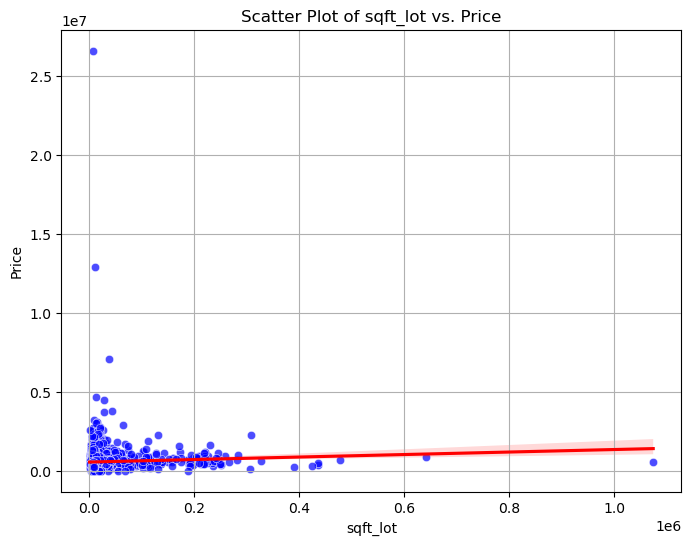

In [82]:
# Choose the feature to plot against 'price'
feature_name = 'sqft_lot'

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature_name, y='price', data=data, alpha=0.7, color='b')

# Fit a regression line
sns.regplot(x=feature_name, y='price', data=data, scatter=False, color='r')

# Set labels and title
plt.xlabel(feature_name)
plt.ylabel('Price')
plt.title(f'Scatter Plot of {feature_name} vs. Price')

# Show the plot
plt.grid(True)
plt.show()

# Alphabet.xlsx
# Part-3 

In [1]:
import pandas as pd

In [2]:
df3 = pd.read_excel('ALPHABET_New.xlsx', sheet_name = 'Python')

In [3]:
df3.shape

(50, 18)

In [4]:
df3 = df3.iloc[:, :5]
df3.shape

(50, 5)

In [5]:
df3.describe()

,Date,Open,High,Low,Close
count,50,50.000000,50.000000,50.000000,50.000000
mean,2023-07-29 06:43:12,126.889380,128.380320,125.753300,126.949600
min,2023-06-23 00:00:00,116.760002,118.224998,115.830002,116.870003
25%,2023-07-12 06:00:00,121.484503,123.354999,120.287496,121.280001
50%,2023-07-29 12:00:00,129.095002,130.125000,127.812500,128.705001
75%,2023-08-15 18:00:00,130.941250,132.485748,129.842254,130.632503
max,2023-09-01 00:00:00,138.429993,138.580002,136.820007,137.350006
std,NaN,5.643626,5.662015,5.578896,5.630683


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    50 non-null     datetime64[ns]
 1   Open    50 non-null     float64       
 2   High    50 non-null     float64       
 3   Low     50 non-null     float64       
 4   Close   50 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.1 KB


In [7]:
df3.head()

,Date,Open,High,Low,Close
0,2023-06-23,122.040001,123.440002,121.860001,123.019997
1,2023-06-26,121.466003,122.720001,118.989998,119.089996
2,2023-06-27,117.839996,119.894997,116.910004,119.010002
3,2023-06-28,117.959999,121.269997,117.599998,121.080002
4,2023-06-29,120.089996,120.910004,119.209999,120.010002
